# Exploring ACC consumption

## importing libraries

In [1]:
import os

import src.read_data as read
import src.compare_trajectories as compare
import src.plot_data as plot
import src.smooth_data as smooth
import src.export_data as export
import src.exploiting_vehlib as exploit
import src.extract_event as extract
import src.examine_HighD as HighD
import src.exploit_engine_data as engine

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange
import seaborn as sns
from scipy import stats

ModuleNotFoundError: No module named 'statsmodels'

In [2]:
plt.rcParams["font.family"] = 'Times New Roman'

In [3]:
path = os.getcwd()+'/data/'

## Selecting data

In [3]:
#oppening the data
dictionnary_short = read.read_all_data(path,'short_setting')
dictionnary_medium = read.read_all_data(path,'medium setting')
dictionnary_long = read.read_all_data(path,'long_setting')
dictionnary_no_ACC = read.read_all_data(path,'no_ACC')
dictionnary_mixed = read.read_all_data(path,'mixed')

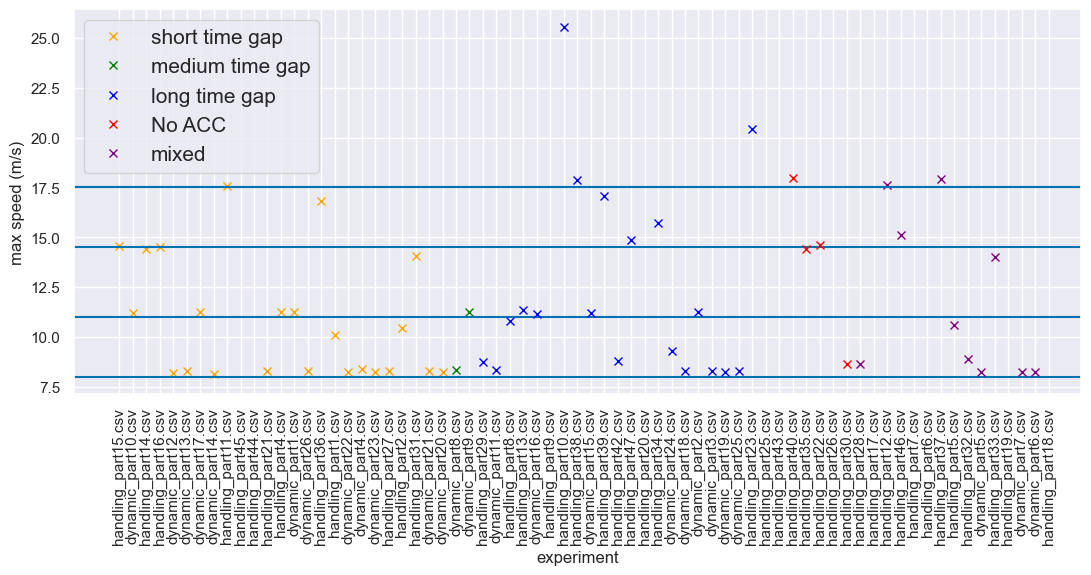

In [12]:
#plotting the max speed of the leader
plt.rcParams["figure.figsize"] = (13,5)
plot.plot_multiple_profiles(dictionnary_short, 'Orange', 'short time gap', 8)
plot.plot_multiple_profiles(dictionnary_medium, 'Green', 'medium time gap', 11)
plot.plot_multiple_profiles(dictionnary_long, 'Blue', 'long time gap', 14.5)
plot.plot_multiple_profiles(dictionnary_no_ACC, 'Red', 'No ACC', 17.5)
plot.plot_multiple_profiles(dictionnary_mixed, 'Purple', 'mixed', 17.5)

In [13]:
#creating subdictionnaries built by the max speed of the leader
short_8ms = compare.select_by_speed(dictionnary_short, 8)
short_11ms = compare.select_by_speed(dictionnary_short, 11)
short_14_5ms = compare.select_by_speed(dictionnary_short, 14.5)
short_17_5ms = compare.select_by_speed(dictionnary_short, 17.5)

medium_8ms = compare.select_by_speed(dictionnary_medium, 8)
medium_11ms = compare.select_by_speed(dictionnary_medium, 11)
medium_14_5ms = compare.select_by_speed(dictionnary_medium, 14.5)
medium_17_5ms = compare.select_by_speed(dictionnary_medium, 17.5)

long_8ms = compare.select_by_speed(dictionnary_long, 8)
long_11ms = compare.select_by_speed(dictionnary_long, 11)
long_14_5ms = compare.select_by_speed(dictionnary_long, 14.5)
long_17_5ms = compare.select_by_speed(dictionnary_long, 17.5)

no_ACC_8ms = compare.select_by_speed(dictionnary_no_ACC, 8)
no_ACC_11ms = compare.select_by_speed(dictionnary_no_ACC, 11)
no_ACC_14_5ms = compare.select_by_speed(dictionnary_no_ACC, 14.5)
no_ACC_17_5ms = compare.select_by_speed(dictionnary_no_ACC, 17.5)

mixed_8ms = compare.select_by_speed(dictionnary_mixed, 8)
mixed_11ms = compare.select_by_speed(dictionnary_mixed, 11)
mixed_14_5ms = compare.select_by_speed(dictionnary_mixed, 14.5)
mixed_17_5ms = compare.select_by_speed(dictionnary_mixed, 17.5)

In [14]:
#comparing the speed profiles using Frechet distance
df_8ms = compare.routine (short_8ms, medium_8ms, long_8ms, no_ACC_8ms,mixed_8ms, 'short', 'medium', 'long', 'no ACC','mixed')
df_11ms = compare.routine (short_11ms, medium_11ms, long_11ms, no_ACC_11ms,mixed_11ms, 'short', 'medium', 'long', 'no ACC','mixed')
df_14_5ms = compare.routine (short_14_5ms, medium_14_5ms, long_14_5ms, no_ACC_14_5ms,mixed_14_5ms, 'short', 'medium', 'long', 'no ACC','mixed')
df_17_5ms = compare.routine (short_17_5ms, medium_17_5ms, long_17_5ms, no_ACC_17_5ms,mixed_17_5ms, 'short', 'medium', 'long', 'no ACC','mixed')


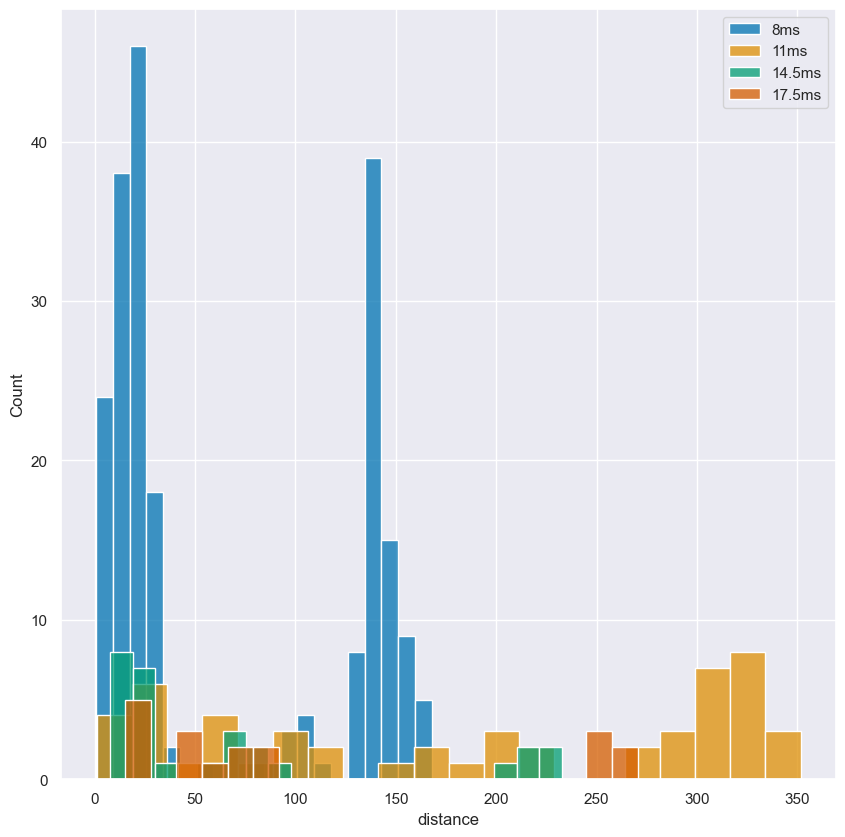

In [16]:
sns.histplot(df_8ms['distance'],bins = 20, label = '8ms')
sns.histplot(df_11ms['distance'],bins = 20, label = '11ms')
sns.histplot(df_14_5ms['distance'],bins = 20, label = '14.5ms')
sns.histplot(df_17_5ms['distance'],bins = 20, label = '17.5ms')
plt.legend()

In [15]:
df_11ms.sort_values(by = 'distance')

short             medium    distance                 long  \
0  dynamic_part10.csv                NaN    1.192603    dynamic_part2.csv   
0  dynamic_part17.csv                NaN    3.147101    dynamic_part2.csv   
0  dynamic_part17.csv                NaN   10.437845   dynamic_part15.csv   
0  dynamic_part10.csv                NaN   12.239866   dynamic_part15.csv   
0   dynamic_part1.csv                NaN   19.930803   dynamic_part16.csv   
0                 NaN  dynamic_part9.csv   29.329121   dynamic_part15.csv   
0  handling_part4.csv                NaN   29.348511  handling_part13.csv   
0   dynamic_part1.csv                NaN   34.203167   dynamic_part15.csv   
0  dynamic_part10.csv                NaN   34.738839   dynamic_part16.csv   
0  dynamic_part17.csv                NaN   35.974358   dynamic_part16.csv   
0   dynamic_part1.csv                NaN   42.742486    dynamic_part2.csv   
0   dynamic_part1.csv  dynamic_part9.csv   55.790741                  NaN   
0                 NaN                NaN   56.890578   handling_part8.csv   
0                 NaN  dynamic_part9.csv   60.084269   dynamic_part16.csv   
0                 NaN  dynamic_part9.csv   60.782920    dynamic_part2.csv   
0  handling_part4.csv                NaN   78.671643   handling_part8.csv   
0                 NaN                NaN   93.578090  handling_part13.csv   
0  dynamic_part10.csv  dynamic_part9.csv   95.273718                  NaN   
0  dynamic_part17.csv  dynamic_part9.csv   96.242772                  NaN   
0  handling_part1.csv                NaN  110.216304   dynamic_part16.csv   
0  handling_part4.csv                NaN  117.244207                  NaN   
0  handling_part2.csv                NaN  155.557638  handling_part13.csv   
0  handling_part2.csv                NaN  162.887462   handling_part8.csv   
0  handling_part1.csv                NaN  169.833918                  NaN   
0  handling_part2.csv                NaN  180.518950                  NaN   
0                 NaN                NaN  195.696185   dynamic_part16.csv   
0  handling_part1.csv                NaN  195.890730   handling_part8.csv   
0  handling_part4.csv                NaN  204.632344   dynamic_part16.csv   
0  handling_part1.csv                NaN  216.137345  handling_part13.csv   
0  handling_part2.csv                NaN  216.812118   dynamic_part16.csv   
0  handling_part4.csv                NaN  267.026763   dynamic_part15.csv   
0  handling_part1.csv                NaN  278.641696   dynamic_part15.csv   
0  handling_part1.csv                NaN  282.268635    dynamic_part2.csv   
0  handling_part1.csv  dynamic_part9.csv  288.723149                  NaN   
0                 NaN  dynamic_part9.csv  291.849128  handling_part13.csv   
0  dynamic_part17.csv                NaN  301.210048  handling_part13.csv   
0  dynamic_part10.csv                NaN  304.418469  handling_part13.csv   
0                 NaN                NaN  305.253156   dynamic_part15.csv   
0                 NaN  dynamic_part9.csv  306.650168   handling_part8.csv   
0  dynamic_part17.csv                NaN  312.764899   handling_part8.csv   
0  dynamic_part10.csv                NaN  313.171339   handling_part8.csv   
0                 NaN                NaN  316.309860    dynamic_part2.csv   
0  dynamic_part17.csv                NaN  316.867571                  NaN   
0  dynamic_part10.csv                NaN  317.404665                  NaN   
0   dynamic_part1.csv                NaN  318.061695                  NaN   
0                 NaN  dynamic_part9.csv  318.167941                  NaN   
0  handling_part4.csv                NaN  319.570028    dynamic_part2.csv   
0   dynamic_part1.csv                NaN  322.107523  handling_part13.csv   
0  handling_part4.csv  dynamic_part9.csv  322.368512                  NaN   
0   dynamic_part1.csv                NaN  329.791167   handling_part8.csv   
0  handling_part2.csv                NaN  348.717596    dynamic_part2.csv   
0  handling_

318.1679413433936

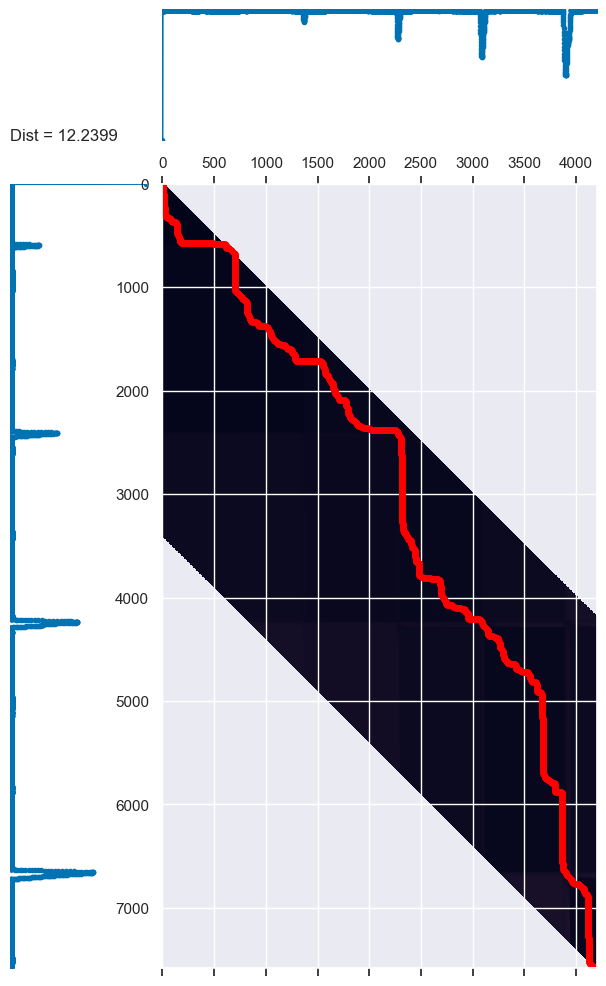

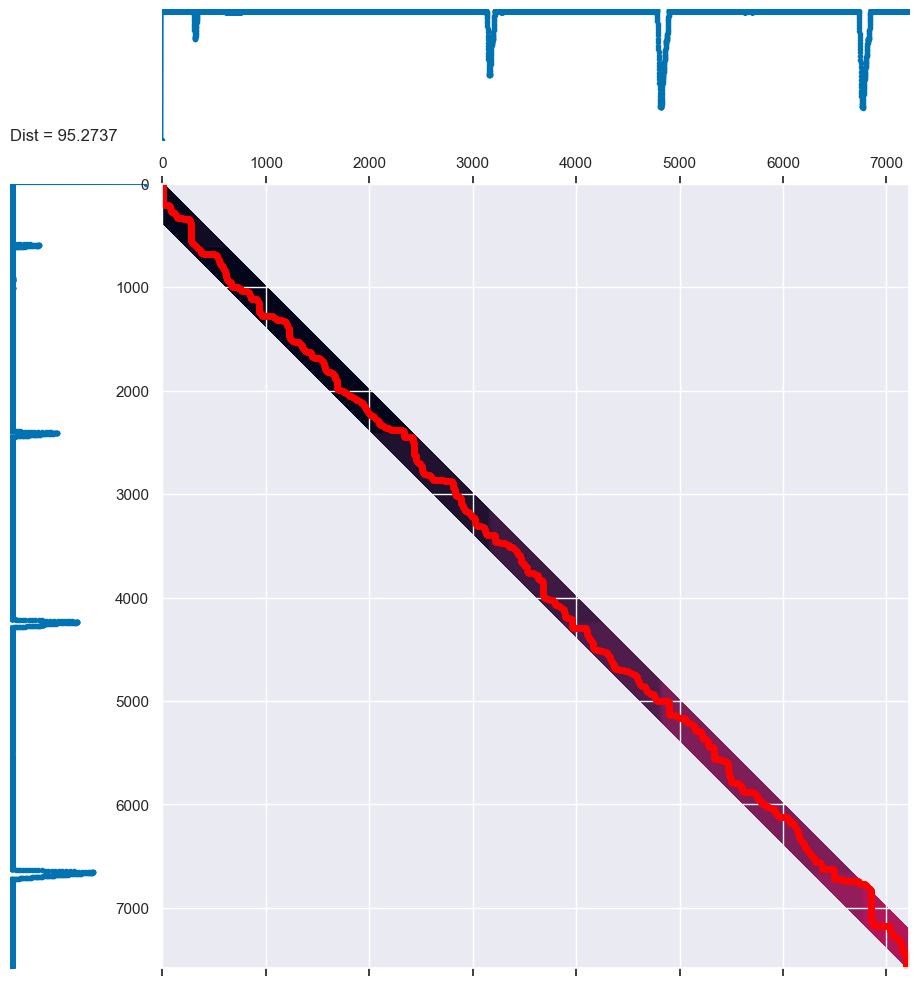

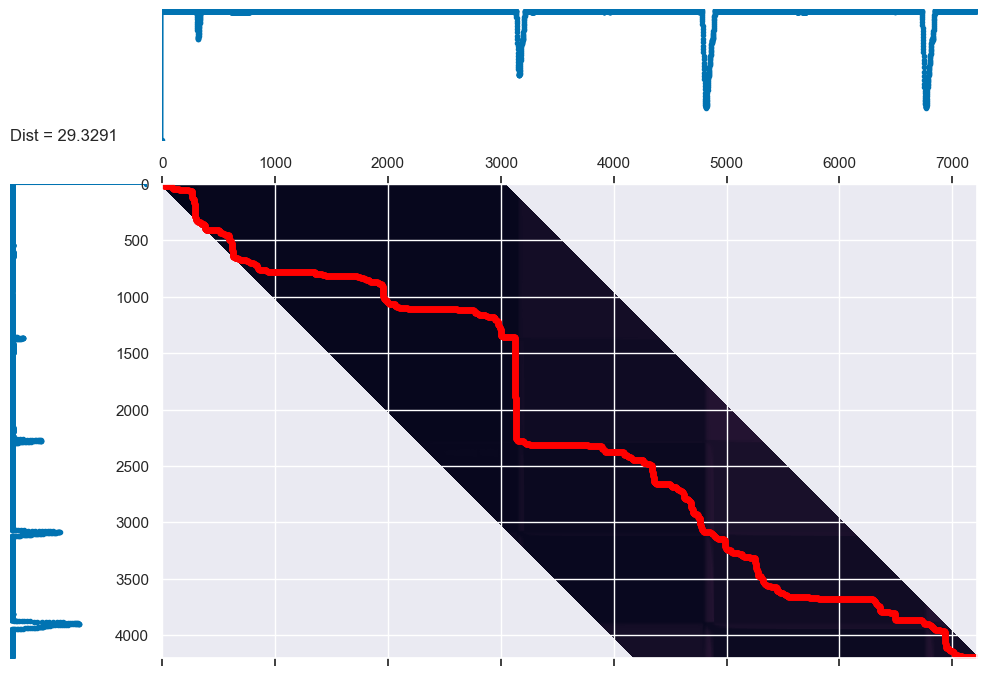

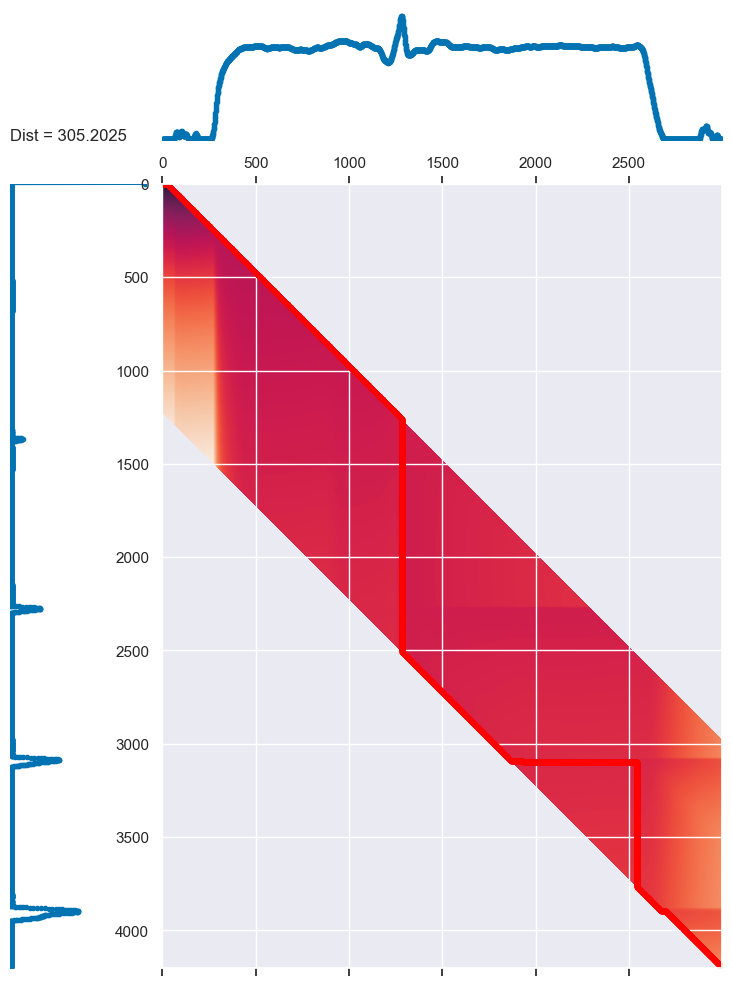

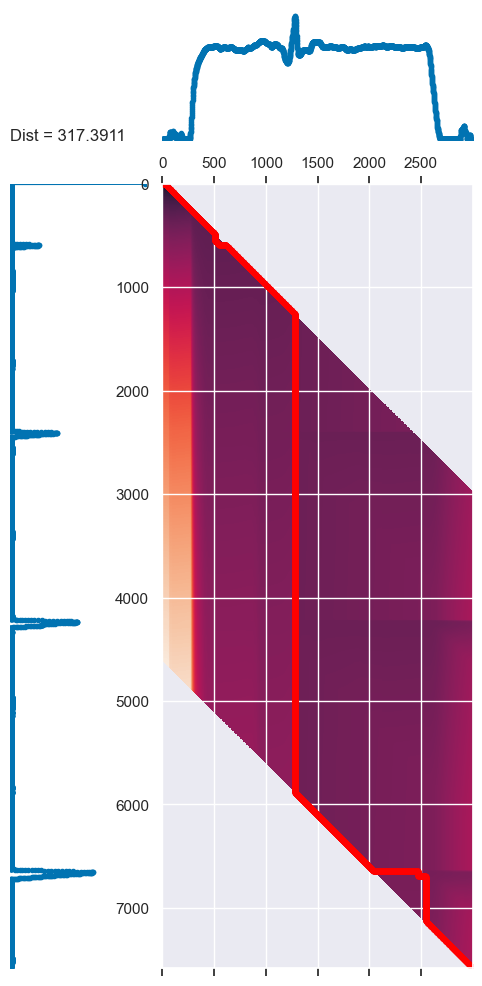

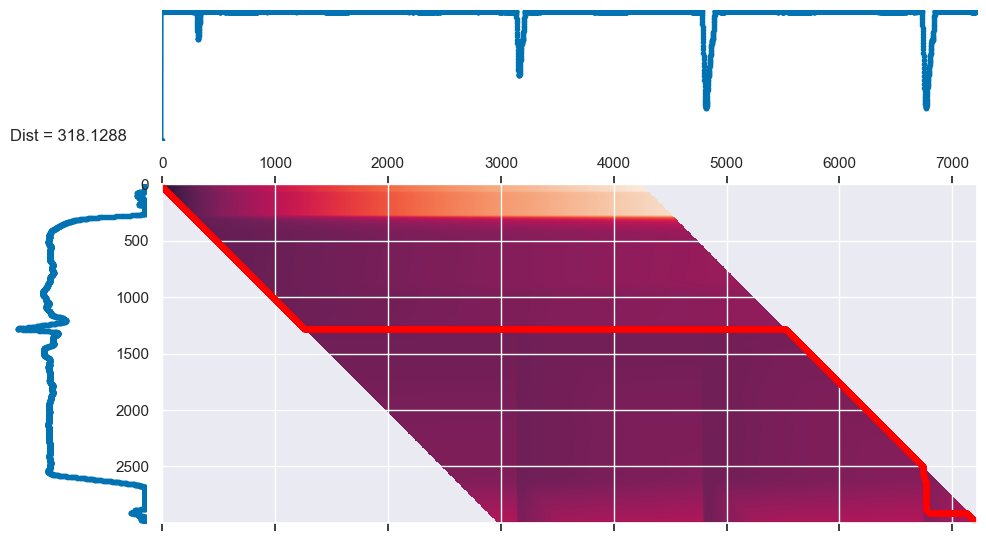

In [ ]:
compare.compare_trajectory(short_11ms['dynamic_part10.csv'], long_11ms['dynamic_part15.csv'],plotting = True)
compare.compare_trajectory(short_11ms['dynamic_part10.csv'], medium_11ms['dynamic_part9.csv'],plotting = True)
compare.compare_trajectory(long_11ms['dynamic_part15.csv'], medium_11ms['dynamic_part9.csv'],plotting = True)
compare.compare_trajectory(long_11ms['dynamic_part15.csv'], mixed_11ms['handling_part5.csv'],plotting = True)
compare.compare_trajectory(short_11ms['dynamic_part10.csv'], mixed_11ms['handling_part5.csv'],plotting = True)
compare.compare_trajectory(mixed_11ms['handling_part5.csv'], medium_11ms['dynamic_part9.csv'],plotting = True)

In [ ]:
df_17_5ms.sort_values(by = 'distance')

short  medium    distance                 long  \
0  handling_part36.csv     NaN   15.245814                  NaN   
0  handling_part36.csv     NaN   16.957785                  NaN   
0                  NaN     NaN   21.396731                  NaN   
0  handling_part36.csv     NaN   22.615555                  NaN   
0  handling_part11.csv     NaN   26.464597                  NaN   
0  handling_part11.csv     NaN   42.623579                  NaN   
0                  NaN     NaN   49.171530                  NaN   
0  handling_part11.csv     NaN   49.671307                  NaN   
0                  NaN     NaN   54.641007  handling_part39.csv   
0  handling_part36.csv     NaN   68.142282  handling_part39.csv   
0                  NaN     NaN   71.570094  handling_part39.csv   
0                  NaN     NaN   80.777351  handling_part39.csv   
0  handling_part11.csv     NaN   84.770515  handling_part39.csv   
0                  NaN     NaN  255.187387  handling_part38.csv   
0                  NaN     NaN  255.886846  handling_part38.csv   
0  handling_part36.csv     NaN  257.176934  handling_part38.csv   
0  handling_part11.csv     NaN  263.963529  handling_part38.csv   
0                  NaN     NaN  270.444292  handling_part38.csv   

                no ACC                mixed  
0                  NaN  handling_part37.csv  
0                  NaN  handling_part12.csv  
0  handling_part40.csv  handling_part37.csv  
0  handling_part40.csv                  NaN  
0                  NaN  handling_part37.csv  
0  handling_part40.csv                  NaN  
0  handling_part40.csv  handling_part12.csv  
0                  NaN  handling_part12.csv  
0  handling_part40.csv                  NaN  
0                  NaN                  NaN  
0                  NaN  handling_part37.csv  
0                  NaN  handling_part12.csv  
0                  NaN                  NaN  
0                  NaN  handling_part12.csv  
0                  NaN  handling_part37.csv  
0                  NaN                  NaN  
0                  NaN                  NaN  
0  handling_part40.csv                  NaN

71.57009381385883

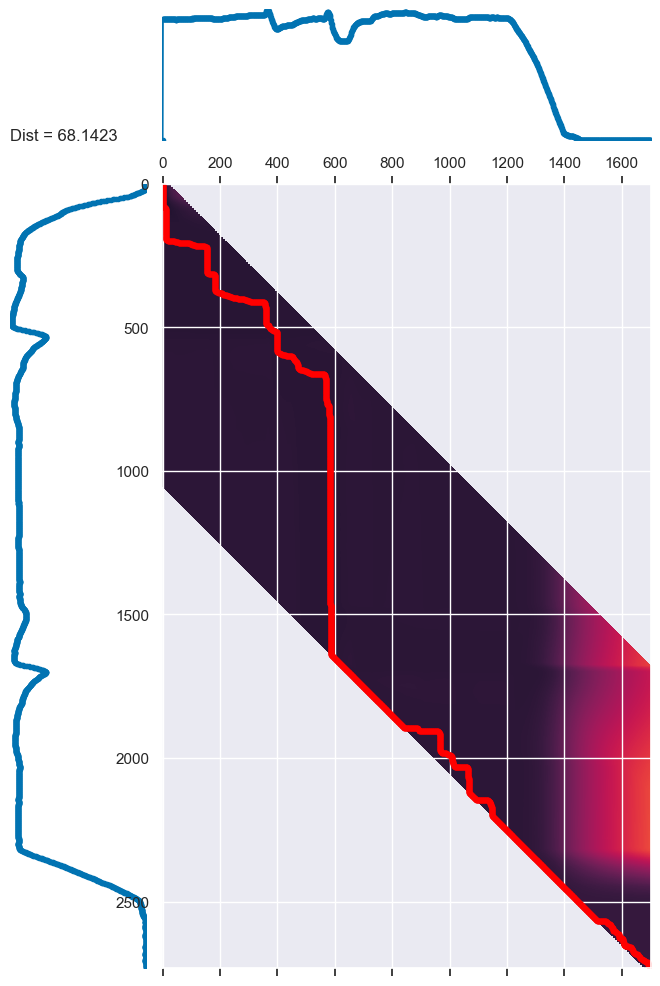

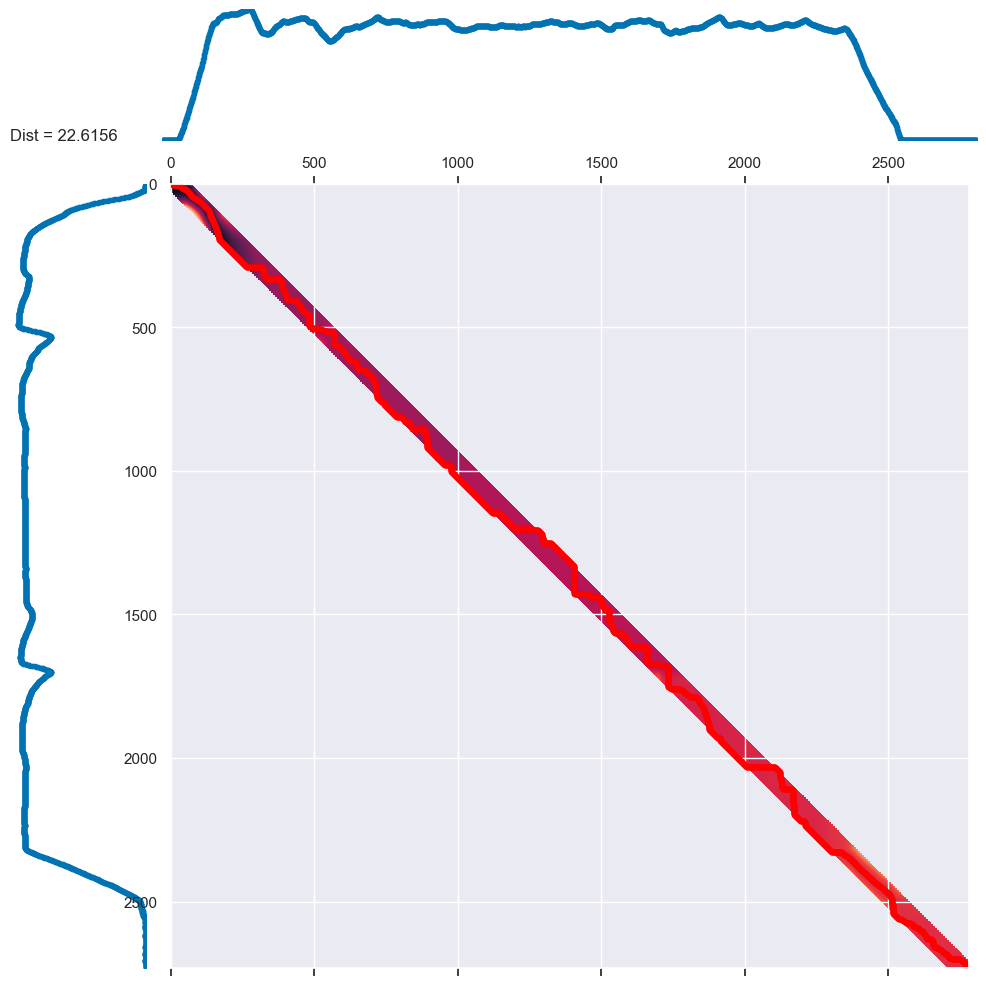

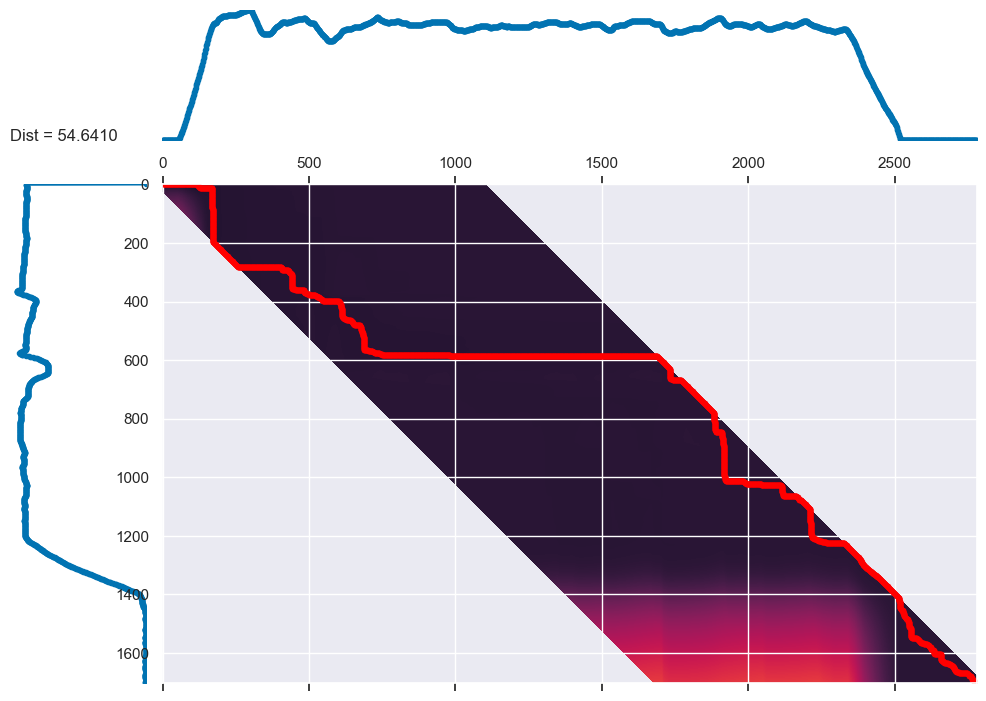

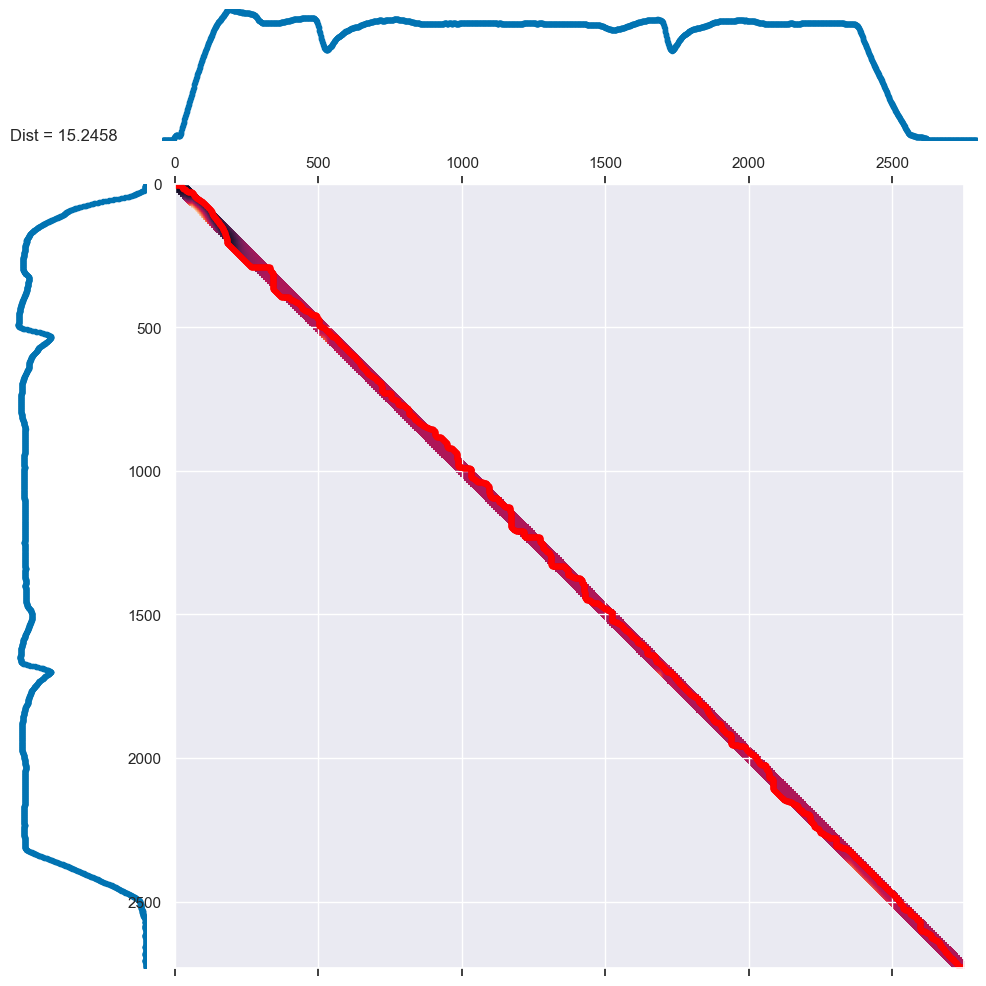

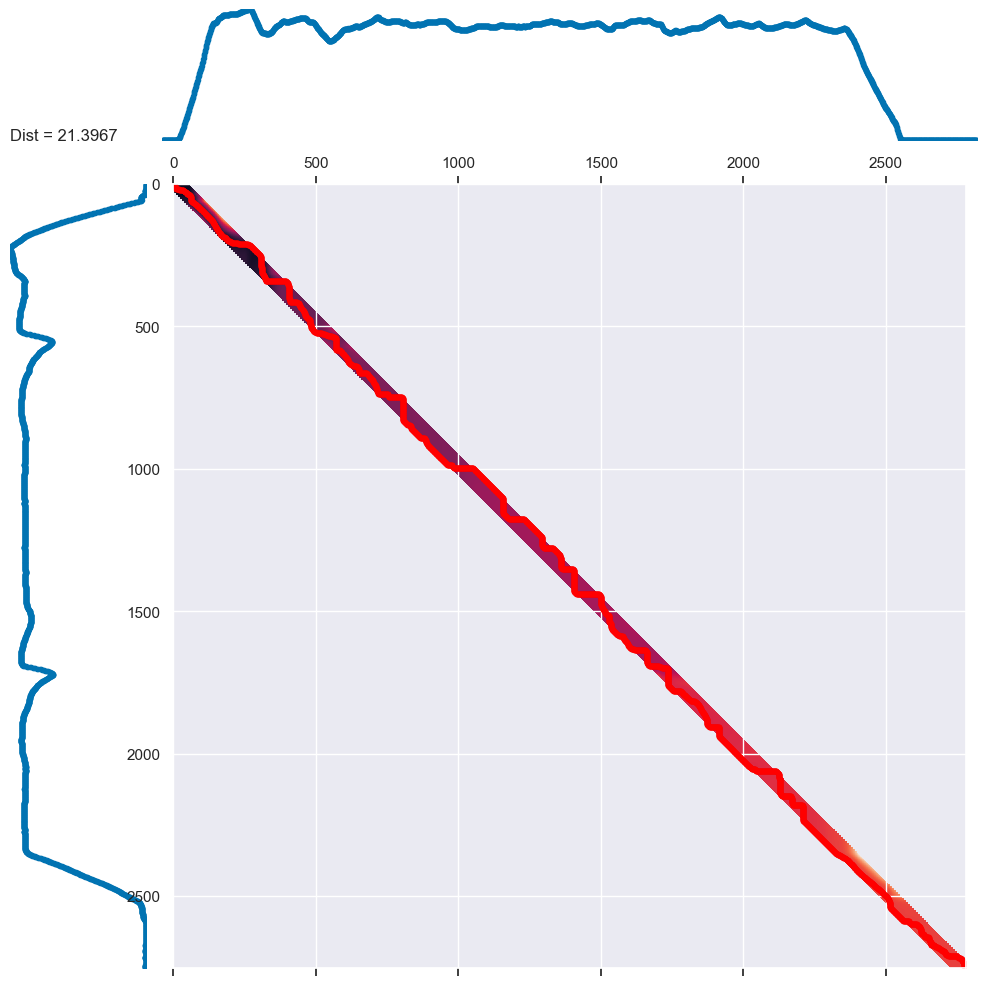

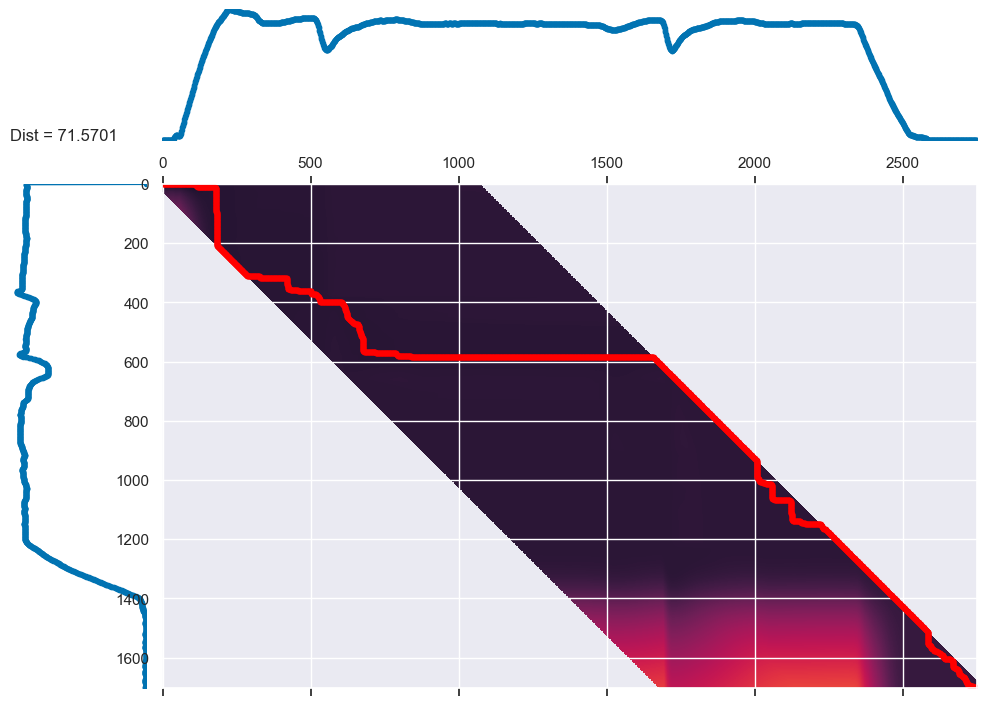

In [ ]:
compare.compare_trajectory(short_17_5ms['handling_part36.csv'], long_17_5ms['handling_part39.csv'],plotting = True)
compare.compare_trajectory(short_17_5ms['handling_part36.csv'], no_ACC_17_5ms['handling_part40.csv'],plotting = True)
compare.compare_trajectory(long_17_5ms['handling_part39.csv'], no_ACC_17_5ms['handling_part40.csv'],plotting = True)
compare.compare_trajectory(short_17_5ms['handling_part36.csv'], mixed_17_5ms['handling_part37.csv'],plotting = True)
compare.compare_trajectory(mixed_17_5ms['handling_part37.csv'], no_ACC_17_5ms['handling_part40.csv'],plotting = True)
compare.compare_trajectory(long_17_5ms['handling_part39.csv'], mixed_17_5ms['handling_part37.csv'],plotting = True)


In [ ]:
df_14_5ms.sort_values(by = 'distance')

short  medium    distance                 long  \
0  handling_part16.csv     NaN    7.878954                  NaN   
0  handling_part16.csv     NaN    8.351264                  NaN   
0  handling_part16.csv     NaN    8.507634  handling_part47.csv   
0                  NaN     NaN    9.126012  handling_part47.csv   
0  handling_part16.csv     NaN   11.667022                  NaN   
0                  NaN     NaN   12.674295                  NaN   
0  handling_part16.csv     NaN   16.103167                  NaN   
0                  NaN     NaN   16.474191                  NaN   
0                  NaN     NaN   19.145026                  NaN   
0  handling_part31.csv     NaN   20.090424                  NaN   
0                  NaN     NaN   20.116866  handling_part47.csv   
0  handling_part31.csv     NaN   22.018243                  NaN   
0                  NaN     NaN   25.673708                  NaN   
0                  NaN     NaN   25.701354  handling_part47.csv   
0                  NaN     NaN   26.137849  handling_part47.csv   
0  handling_part31.csv     NaN   37.774656                  NaN   
0  handling_part31.csv     NaN   54.938578  handling_part47.csv   
0  handling_part15.csv     NaN   68.859783  handling_part47.csv   
0  handling_part15.csv     NaN   71.411874                  NaN   
0  handling_part15.csv     NaN   72.696675                  NaN   
0  handling_part31.csv     NaN   79.838207                  NaN   
0  handling_part15.csv     NaN   84.473590                  NaN   
0  handling_part15.csv     NaN   89.419304                  NaN   
0  handling_part14.csv     NaN  208.370194                  NaN   
0  handling_part14.csv     NaN  210.895666                  NaN   
0  handling_part14.csv     NaN  219.427357                  NaN   
0  handling_part14.csv     NaN  232.611305  handling_part47.csv   
0  handling_part14.csv     NaN  232.635121                  NaN   

                no ACC                mixed  
0                  NaN  handling_part46.csv  
0                  NaN  handling_part33.csv  
0                  NaN                  NaN  
0                  NaN  handling_part46.csv  
0  handling_part35.csv                  NaN  
0  handling_part35.csv  handling_part33.csv  
0  handling_part22.csv                  NaN  
0  handling_part35.csv  handling_part46.csv  
0  handling_part22.csv  handling_part33.csv  
0                  NaN  handling_part46.csv  
0                  NaN  handling_part33.csv  
0                  NaN  handling_part33.csv  
0  handling_part22.csv  handling_part46.csv  
0  handling_part22.csv                  NaN  
0  handling_part35.csv                  NaN  
0  handling_part35.csv                  NaN  
0                  NaN                  NaN  
0                  NaN                  NaN  
0  handling_part22.csv                  NaN  
0                  NaN  handling_part46.csv  
0  handling_part22.csv                  NaN  
0                  NaN  handling_part33.csv  
0  handling_part35.csv                  NaN  
0                  NaN  handling_part33.csv  
0                  NaN  handling_part46.csv  
0  handling_part35.csv                  NaN  
0                  NaN                  NaN  
0  handling_part22.csv                  NaN

9.126011594763149

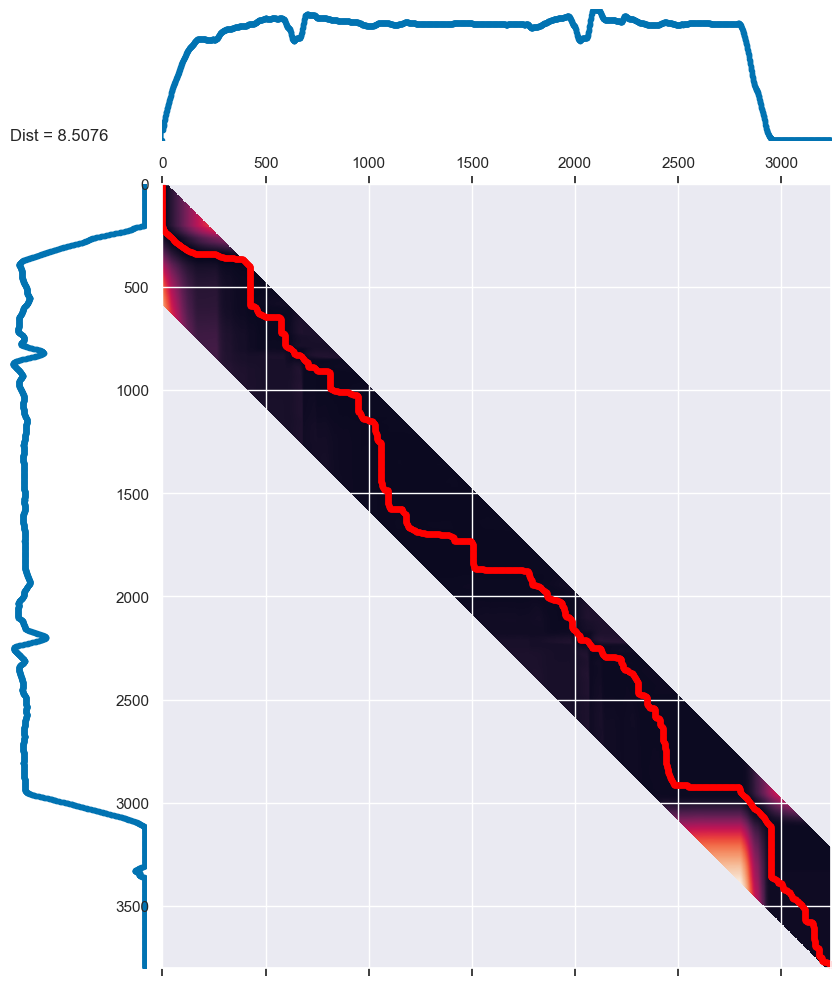

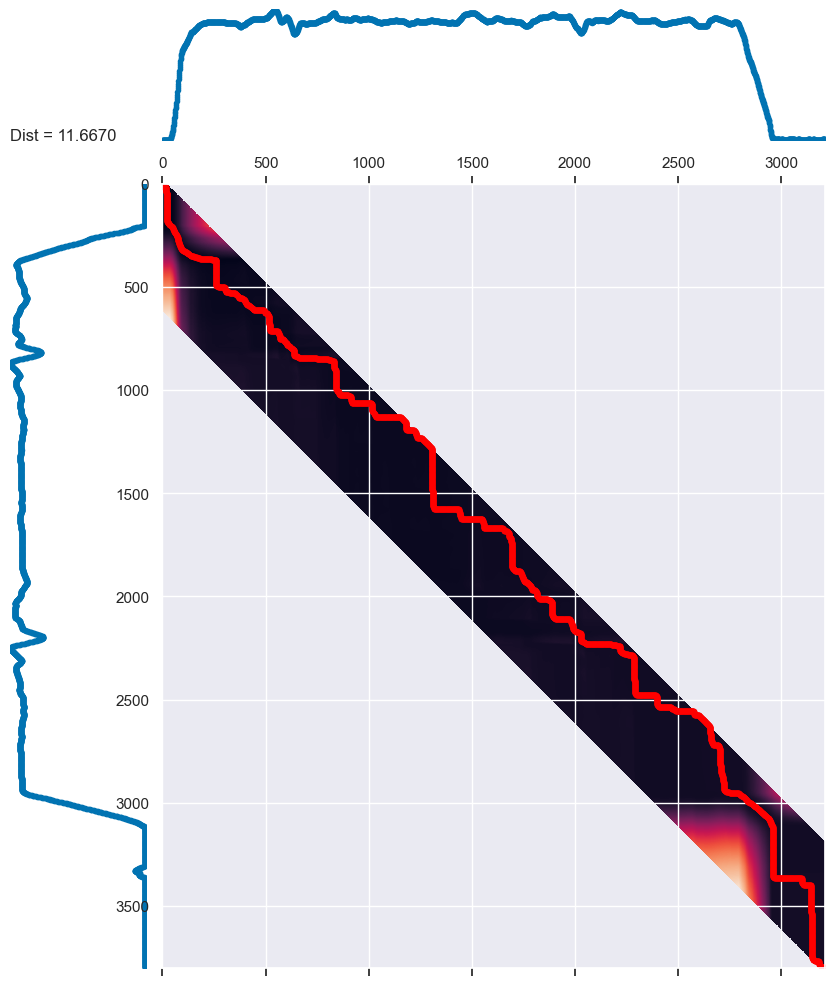

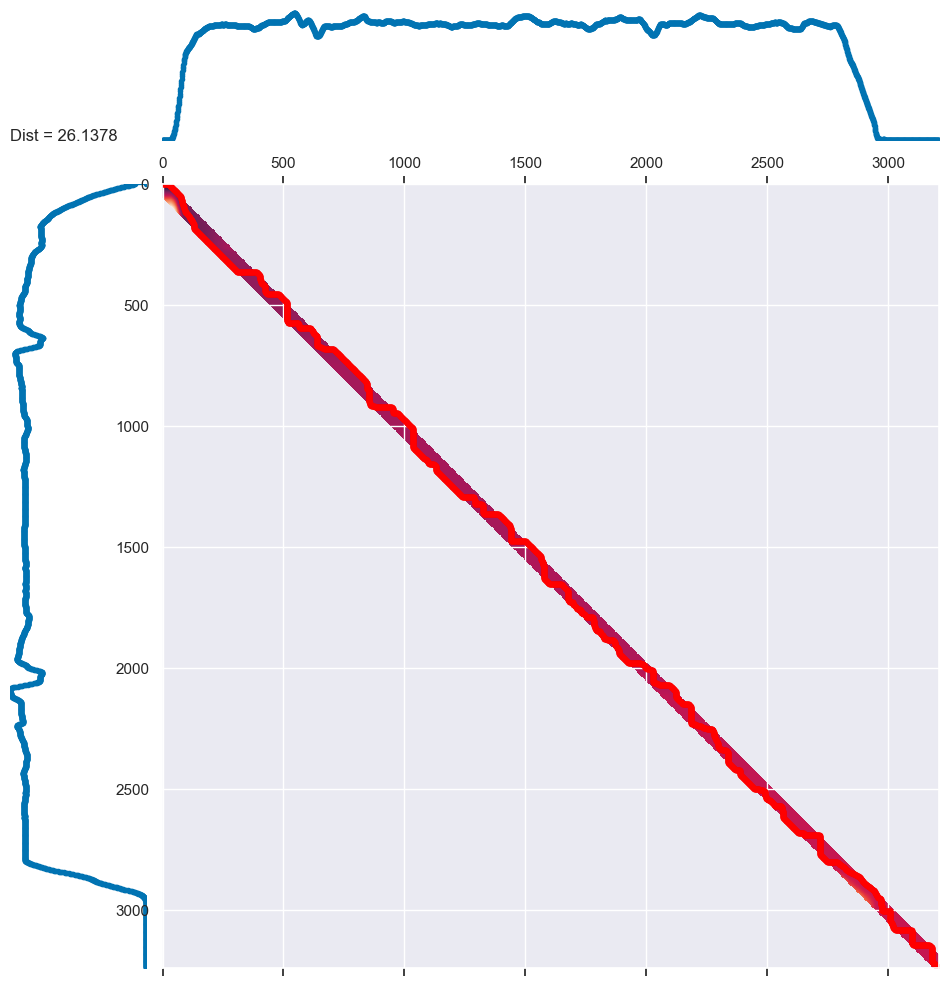

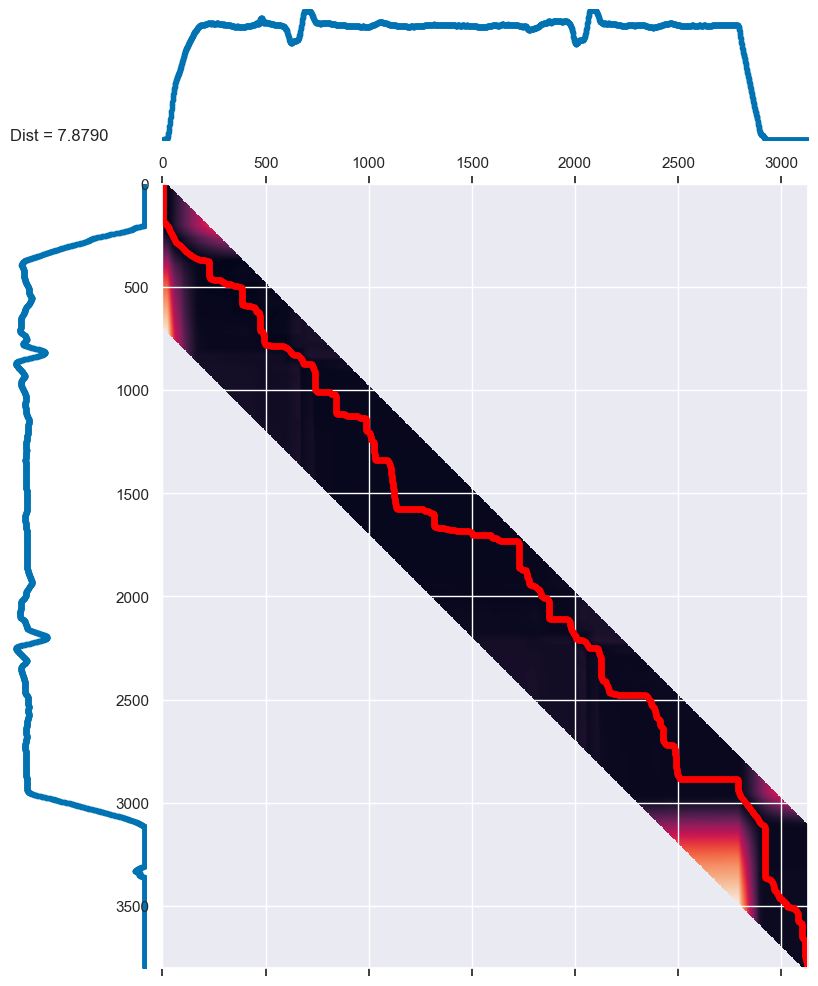

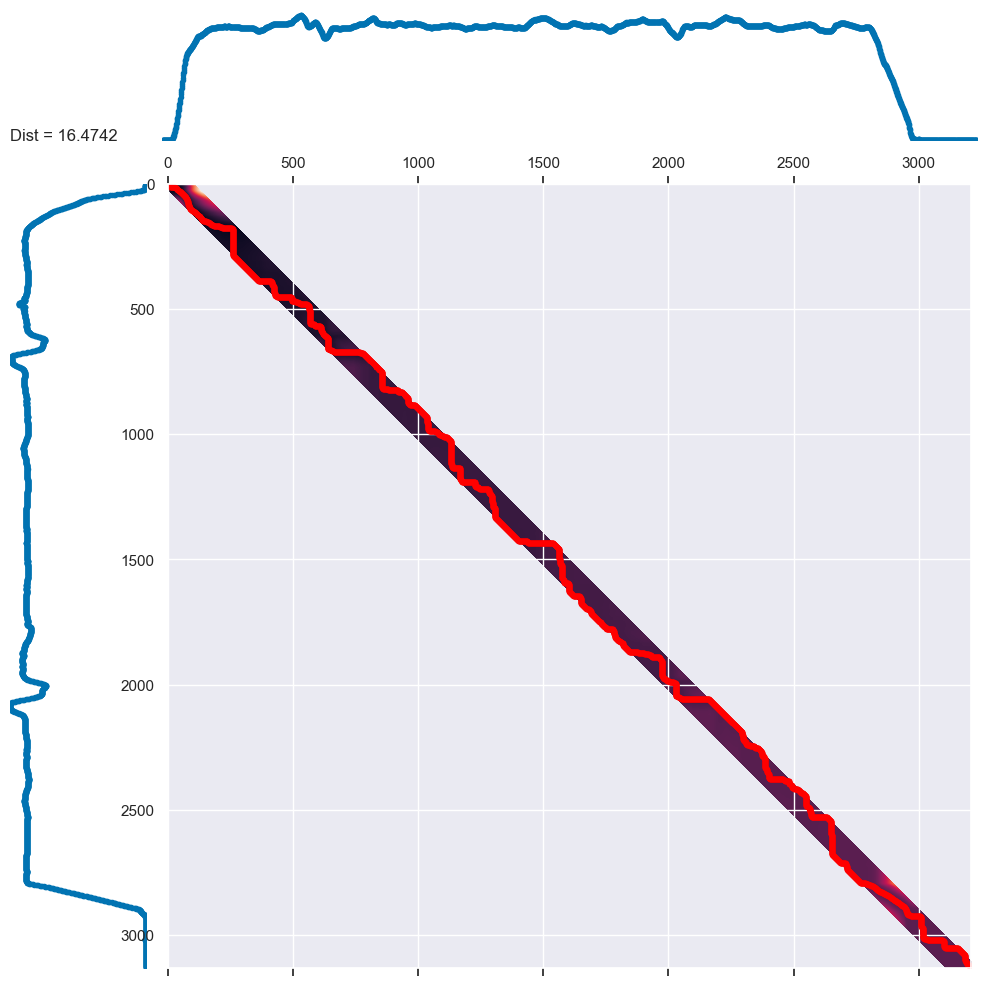

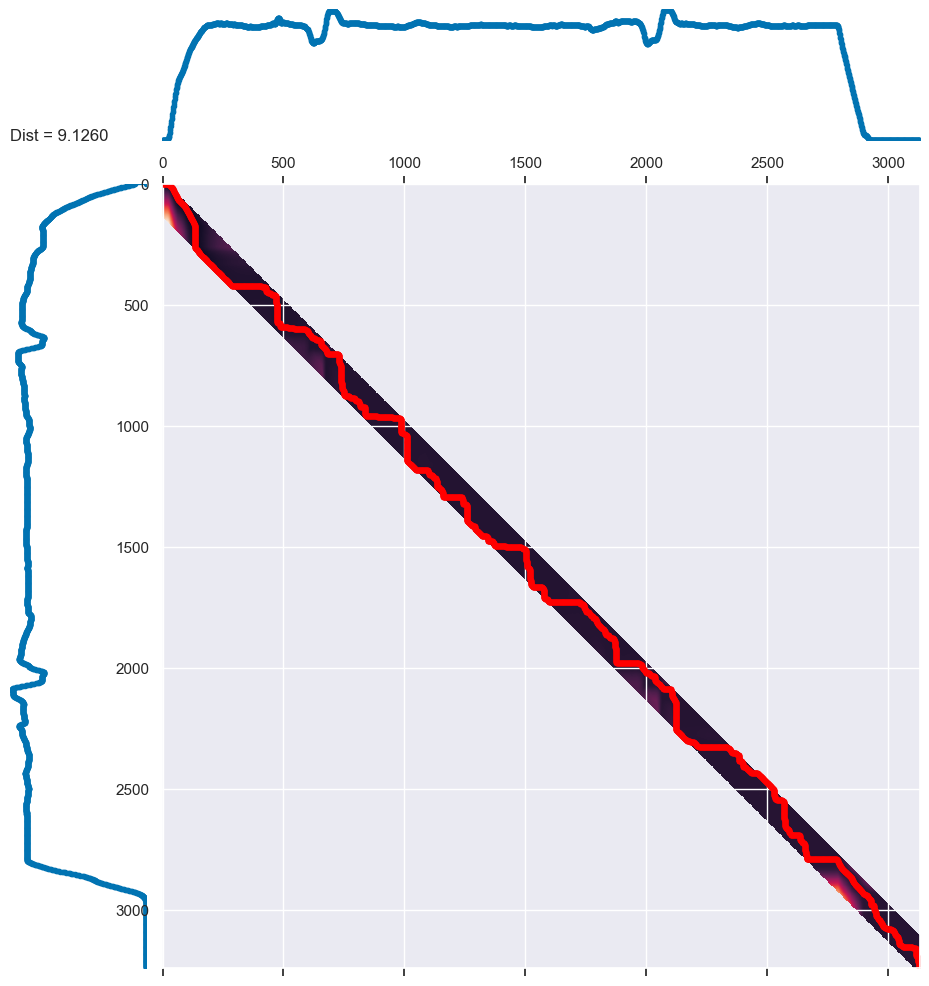

In [17]:
compare.compare_trajectory(short_14_5ms['handling_part16.csv'], long_14_5ms['handling_part47.csv'],plotting = True)
compare.compare_trajectory(short_14_5ms['handling_part16.csv'], no_ACC_14_5ms['handling_part35.csv'],plotting = True)
compare.compare_trajectory(long_14_5ms['handling_part47.csv'], no_ACC_14_5ms['handling_part35.csv'],plotting = True)
compare.compare_trajectory(short_14_5ms['handling_part16.csv'], mixed_14_5ms['handling_part46.csv'],plotting = True)
compare.compare_trajectory(mixed_14_5ms['handling_part46.csv'], no_ACC_14_5ms['handling_part35.csv'],plotting = True)
compare.compare_trajectory(long_14_5ms['handling_part47.csv'], mixed_14_5ms['handling_part46.csv'],plotting = True)

## Correcting and plotting the data

In [105]:
short_14_5ms['handling_part16.csv'] = smooth.interpolate(short_14_5ms['handling_part16.csv'])
long_14_5ms['handling_part47.csv'] = smooth.interpolate(long_14_5ms['handling_part47.csv'])
no_ACC_14_5ms['handling_part35.csv'] = smooth.interpolate(no_ACC_14_5ms['handling_part35.csv'])
mixed_14_5ms['handling_part46.csv'] = smooth.interpolate(mixed_14_5ms['handling_part46.csv'])

short_17_5ms['handling_part36.csv'] = smooth.interpolate(short_17_5ms['handling_part36.csv'])
long_17_5ms['handling_part39.csv'] = smooth.interpolate(long_17_5ms['handling_part39.csv'])
no_ACC_17_5ms['handling_part40.csv'] = smooth.interpolate(no_ACC_17_5ms['handling_part40.csv'])
mixed_17_5ms['handling_part37.csv'] = smooth.interpolate(mixed_17_5ms['handling_part37.csv'])

In [106]:
list_short_11_ms = []
list_medium_11_ms = []
list_long_11ms = []

list_short_14_5_ms = ['Speed2','Speed3','Speed4','Speed5','Speed6','Speed7','Speed8','Speed9','Speed10']
list_mixed_14_5_ms = ['Speed2','Speed3','Speed4','Speed5','Speed6','Speed7','Speed9','Speed10']
list_long_14_5_ms = []
list_no_ACC_14_5_ms = ['Speed2','Speed3','Speed4','Speed5','Speed6','Speed7','Speed8','Speed10']
list_short_17_5_ms = ['Speed2','Speed3','Speed4','Speed5','Speed6','Speed7','Speed8','Speed10']
list_mixed_17_5_ms = ['Speed2','Speed3','Speed4','Speed5','Speed6','Speed7','Speed8','Speed10']
list_long_17_5_ms = []
list_no_ACC_17_5_ms = []

In [107]:
#smooth.smoothing(short_11ms['dynamic_part17.csv'],list_short_11_ms, 'short_time_gap_11ms')
#smooth.smoothing(medium_11ms['dynamic_part9.csv'],list_medium_11_ms, 'medium_time_gap_11ms')
#smooth.smoothing(long_11ms['dynamic_part2.csv'],list_long_11_ms, 'long_time_gap_11ms')

#smooth.smoothing(short_14_5ms['handling_part16.csv'],list_short_14_5_ms, 'short_time_gap_14_5ms')
#smooth.smoothing(long_14_5ms['handling_part47.csv'],list_long_14_5_ms, 'long_time_gap_14_5ms')
smooth.smoothing(no_ACC_14_5ms['handling_part35.csv'],list_no_ACC_14_5_ms, 'no_ACC_time_gap_14_5ms')
#smooth.smoothing(mixed_14_5ms['handling_part46.csv'],list_mixed_14_5_ms, 'mixed_time_gap_14_5ms')

#smooth.smoothing(short_17_5ms['handling_part36.csv'],list_short_17_5_ms, 'short_time_gap_17_5ms')
#smooth.smoothing(long_17_5ms['handling_part39.csv'],list_long_17_5_ms, 'long_time_gap_17_5ms')
#smooth.smoothing(no_ACC_17_5ms['handling_part40.csv'],list_no_ACC_17_5_ms, 'no_ACC_time_gap_17_5ms')
#smooth.smoothing(mixed_17_5ms['handling_part37.csv'],list_mixed_17_5_ms, 'mixed_time_gap_17_5ms')


  0%|          | 0/8 [00:00<?, ?it/s]

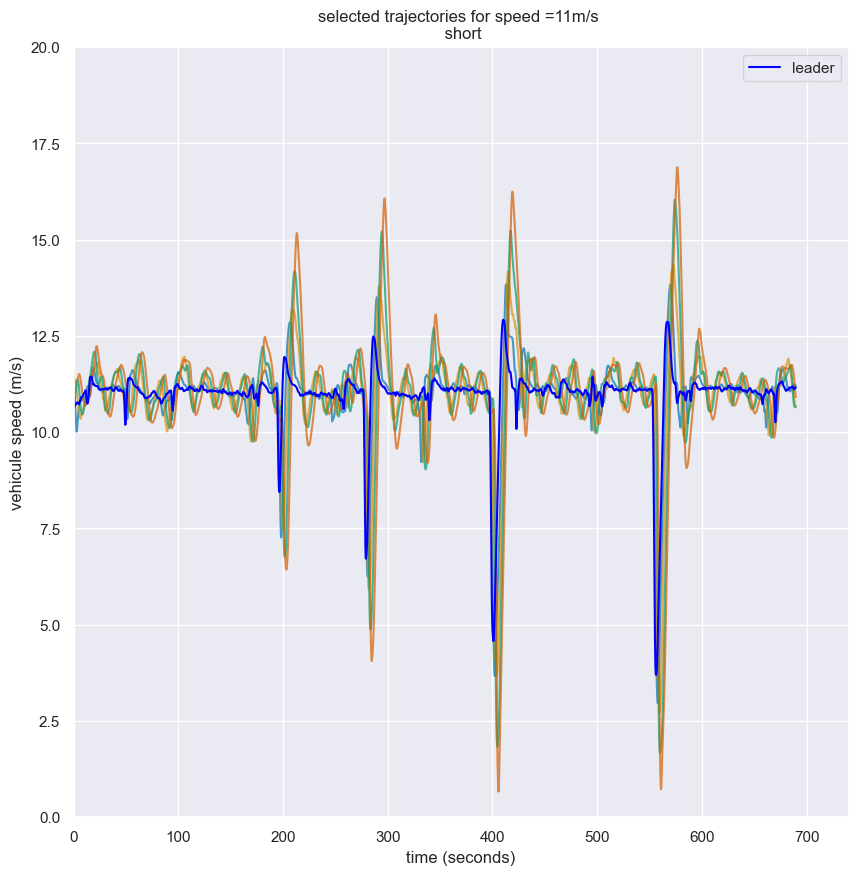

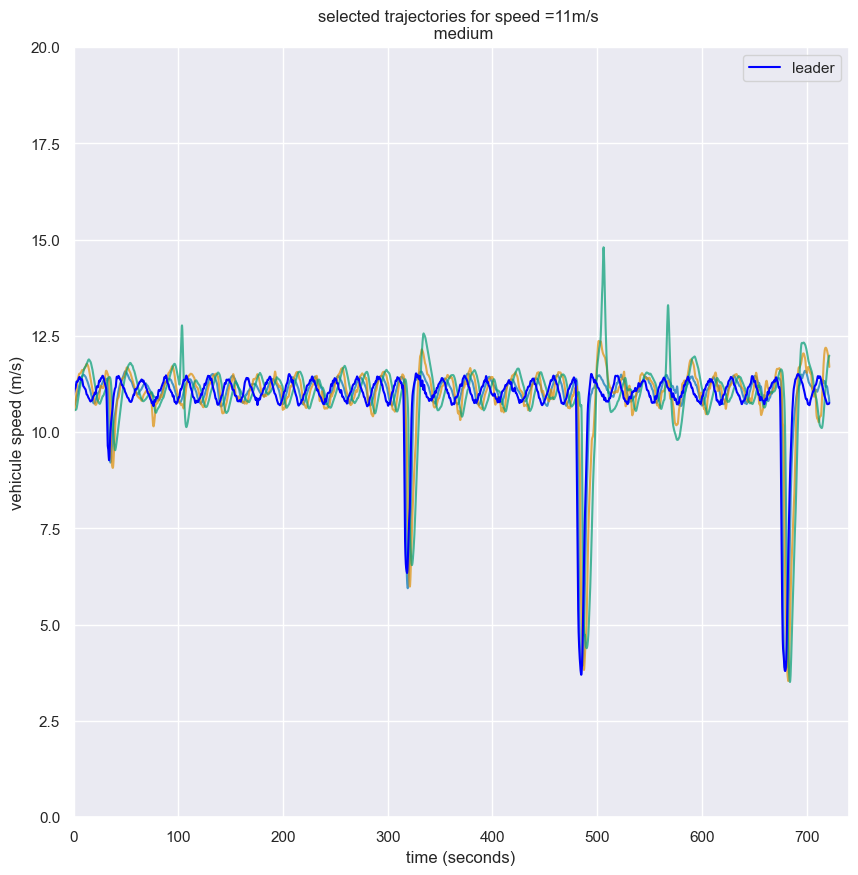

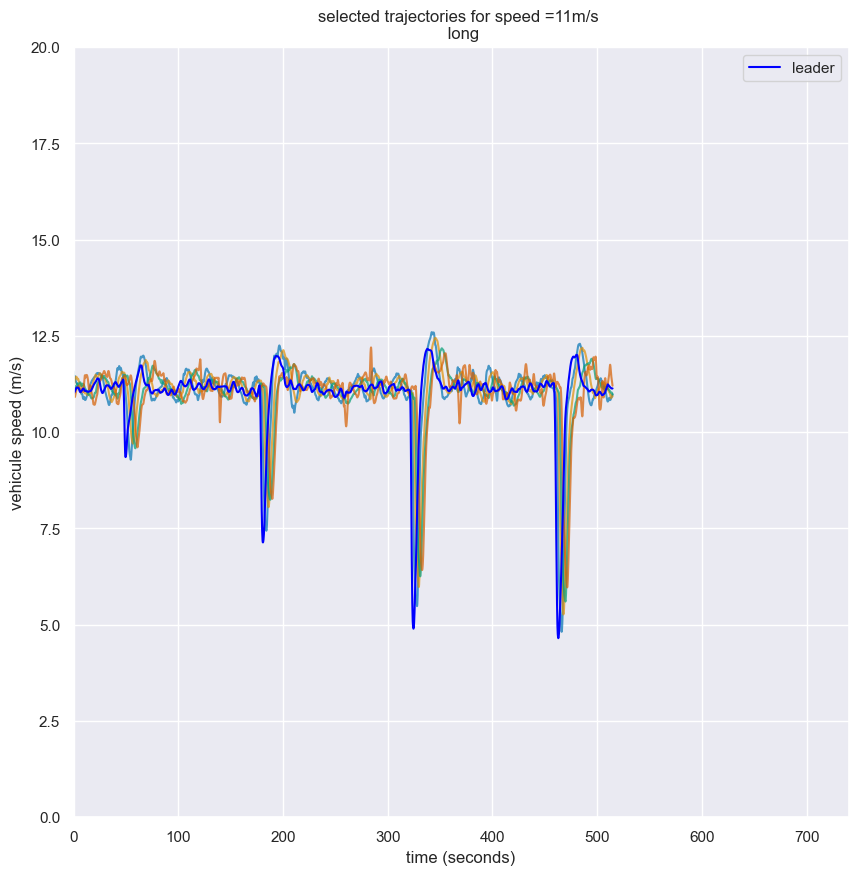

In [108]:
plot.plot_selected_speed('data_for_engine/short_time_gap_11ms.csv', 740, 20, '11', 'short')
plt.show()
plot.plot_selected_speed('data_for_engine/medium_time_gap_11ms.csv', 740, 20, '11', 'medium')
plt.show()
plot.plot_selected_speed('data_for_engine/long_time_gap_11ms.csv', 740, 20, '11', 'long')
plt.show()

### data used for the experiment in Bron

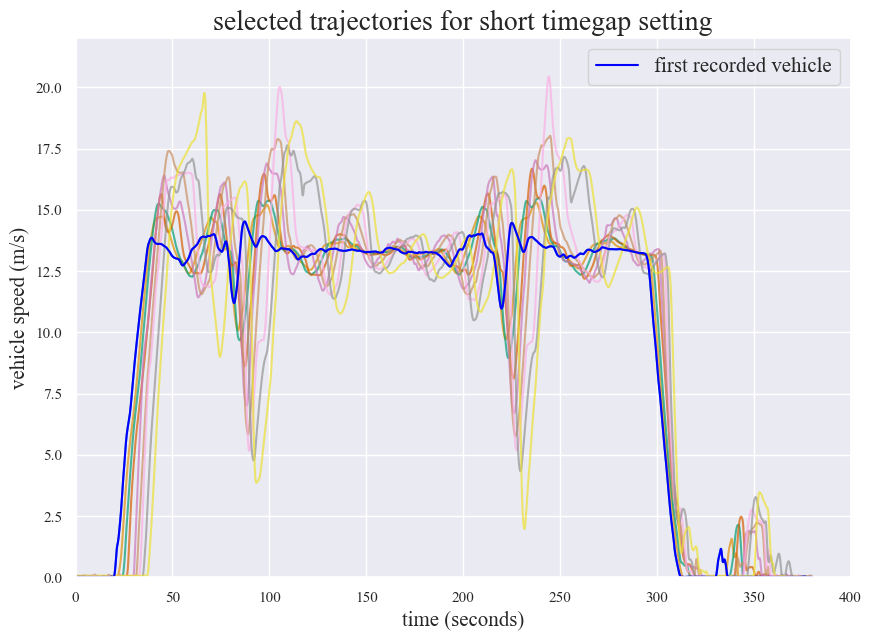

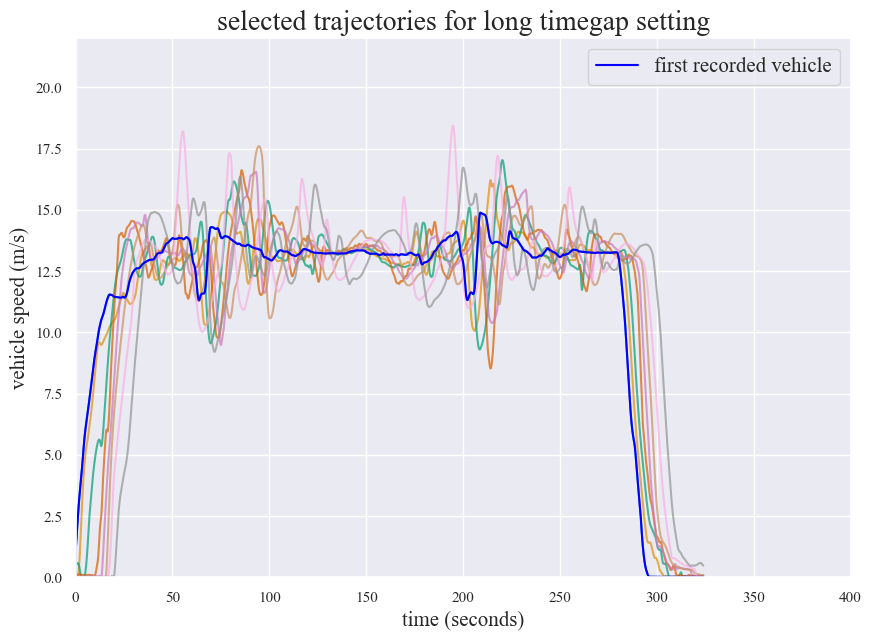

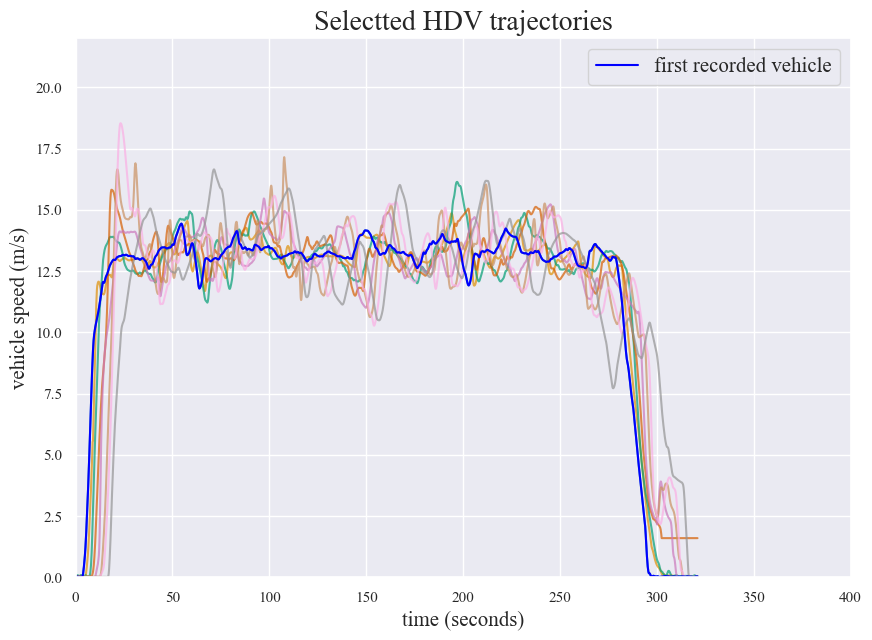

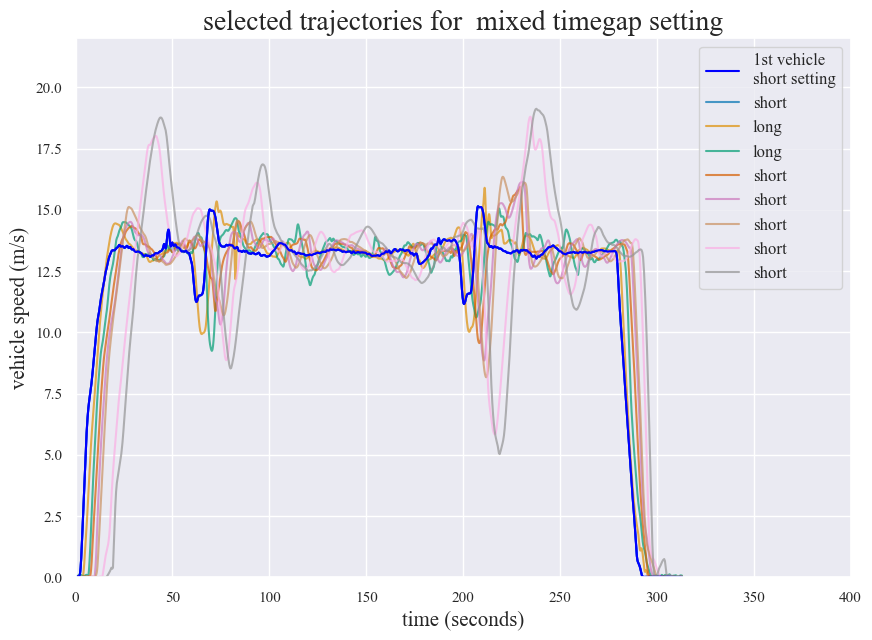

In [59]:
plt.figure(figsize=(10, 7))
plot.plot_selected_speed('data_for_engine/short_time_gap_14_5ms.csv', 400, 22, '14.5', 'short')
plt.show()
plt.figure(figsize=(10, 7))
plot.plot_selected_speed('data_for_engine/long_time_gap_14_5ms.csv', 400, 22, '14.5', 'long')
plt.show()
plt.figure(figsize=(10, 7))
plot.plot_selected_speed('data_for_engine/no_ACC_time_gap_14_5ms.csv', 400, 22, '14.5', 'No ACC')
plt.title('Selectted HDV trajectories', size = 20)
plt.show()
plt.figure(figsize=(10, 7))
setting_list_14_5_ms = ['short','short','long','long','short','short','short','short','short']
plot.plot_selected_speed_mixed_case('data_for_engine/mixed_time_gap_14_5ms.csv', 400, 22, '14.5', 'mixed',setting_list_14_5_ms)
plt.show()

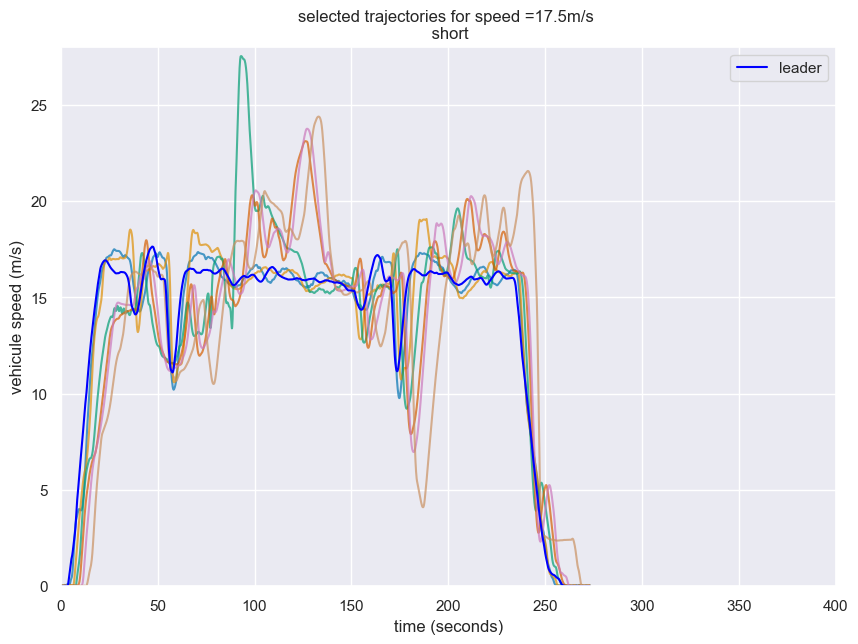

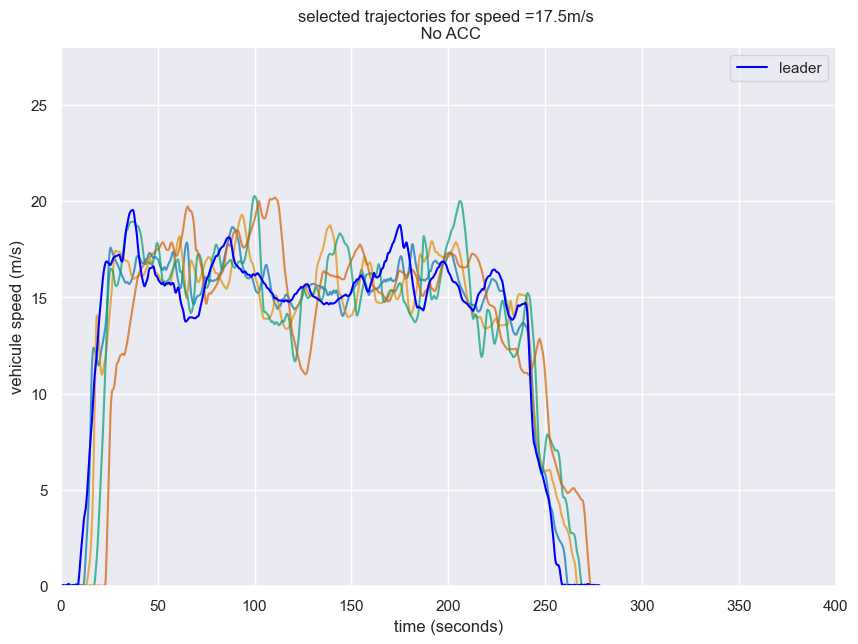

['Speed0', 'Speed1', 'Speed2', 'Speed3', 'Speed4', 'Speed5', 'Speed6', 'Speed7']


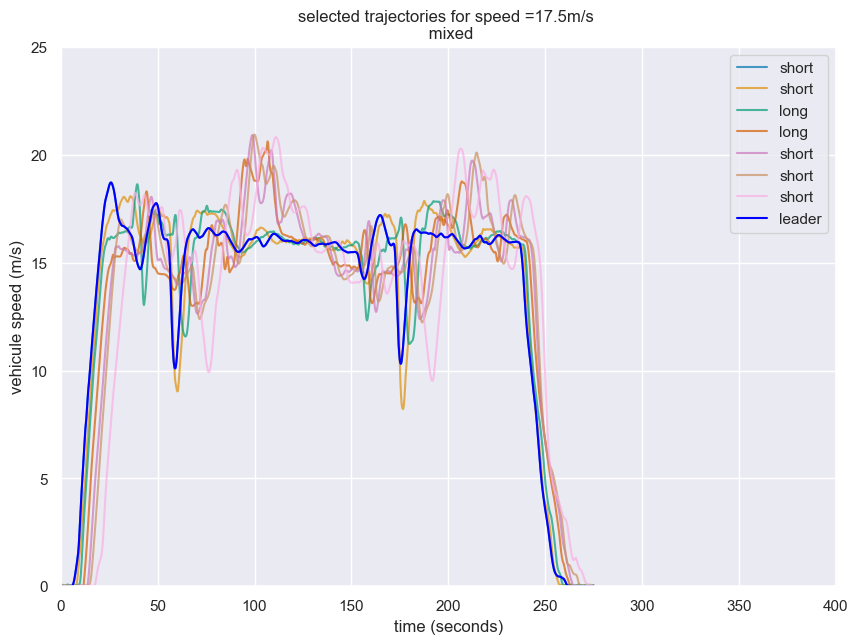

In [110]:
plt.figure(figsize=(10, 7))
plot.plot_selected_speed('data_for_engine/short_time_gap_17_5ms.csv', 400, 28, '17.5', 'short')
plt.show()
plt.figure(figsize=(10, 7))
plot.plot_selected_speed('data_for_engine/no_ACC_time_gap_17_5ms.csv', 400, 28, '17.5', 'No ACC')
plt.show()
plt.figure(figsize=(10, 7))
setting_list_14_5_ms = ['short','short','long','long','short','short','short','short']
plot.plot_selected_speed_mixed_case('data_for_engine/mixed_time_gap_17_5ms.csv', 400, 25, '17.5', 'mixed',setting_list_14_5_ms)
plt.show()

In [111]:
selected_data = os.getcwd()+'/data_for_engine/'
data_to_export = os.listdir(selected_data)
out_dir = os.getcwd()+'/individual_trajectories/'
for k in range(len(data_to_export)) : 
    if '11ms' in data_to_export[k] :
        #adapting the data for the experimental setup by adding a speed plateau before the start of the speed profile
        #so that the speed profile can be followed more accurately by the engine
        out_name = data_to_export[k][:-4]
        data = pd.read_csv(selected_data+data_to_export[k])
        to_export = export.adapt_data_to_bench(data) 
        export.export_trajectories(to_export,out_dir,out_name)
    elif 'short_time_gap_14_5ms' in data_to_export[k] :
        #removing the last section of the 14m/s small setting reccord where we we can see an acceleration/decceleration of the platoon
        #so that our comparison remains on the same type of trajectory
        out_name = data_to_export[k][:-4]
        dataframe = pd.read_csv(selected_data+data_to_export[k])
        dataFrame = dataframe[dataframe['Time']<330]
        export.export_trajectories(dataFrame,out_dir,out_name)
    else :
        out_name = data_to_export[k][:-4]
        dataframe = pd.read_csv(selected_data+data_to_export[k])
        export.export_trajectories(dataframe,out_dir,out_name)

## Simulation results

Platoon lenght     alpha      beta      RMSE  null hypothesis RMSE
Short              9.0  0.268587  4.397926  0.120436              0.607931
Long               8.0  0.116539  4.785126  0.057485              0.115236
Mixed              8.0  0.078367  4.777516  0.017374              0.044073
NO ACC             8.0  0.082198  4.642518  0.033723              0.062529

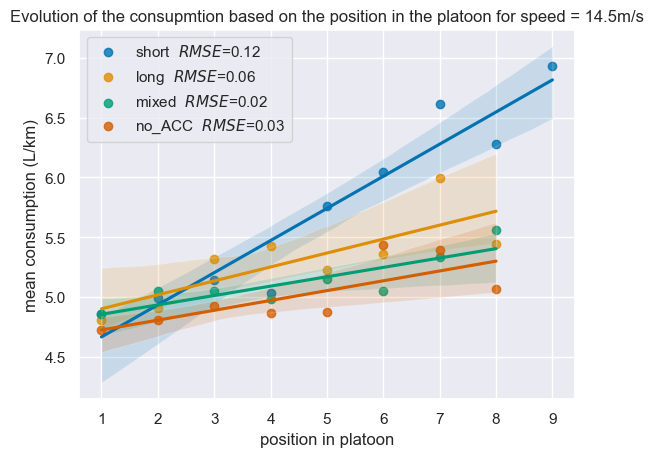

In [3]:
results_path = 'Vehlib_results/consumption/'
fuel_density = 740
vectshort = plot.compute_consumption_regression(results_path,'14_5','short',fuel_density)
vectlong = plot.compute_consumption_regression(results_path,'14_5','long',fuel_density)
vectmixed = plot.compute_consumption_regression(results_path,'14_5','mixed',fuel_density)
vectHDV = plot.compute_consumption_regression(results_path,'14_5','no_ACC',fuel_density)
plt.xlabel('position in platoon')
plt.ylabel('mean consumption [L/100km]')
plt.title('Evolution of the consupmtion based on the position in the platoon for speed = 14.5m/s')
plt.legend()
settings = ['short','long','mixed','no_ACC']
null_hypothesis = np.array([exploit.test_null_regression(results_path,'14_5',k,fuel_density) for k in settings])
df_conso_14_5 = pd.DataFrame({'Short' : vectshort,'Long' :vectlong,'Mixed':vectmixed,'NO ACC':vectHDV})
index = pd.Series(['Platoon lenght','alpha','beta','RMSE'])
df_conso_14_5.index = index
df_conso_14_5 = df_conso_14_5.T
df_conso_14_5['null hypothesis RMSE'] = null_hypothesis
df_conso_14_5

Platoon lenght     alpha      beta      RMSE  null hypothesis RMSE
Short              8.0  0.315450  4.537381  0.112614              0.717978
Mixed              8.0  0.092101  5.036788  0.056224              0.109260
NO ACC             6.0  0.154892  4.446886  0.171894              0.186628

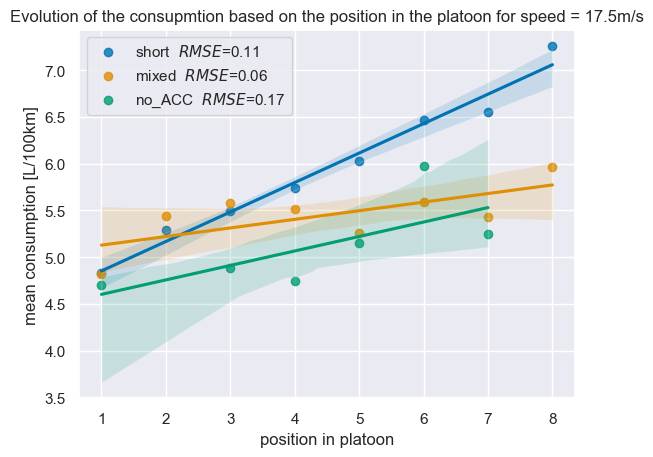

In [8]:
results_path = 'Vehlib_results/consumption/'
fuel_density = 740
vectshort = plot.compute_consumption_regression(results_path,'17_5','short',fuel_density)
vectmixed = plot.compute_consumption_regression(results_path,'17_5','mixed',fuel_density)
vectHDV = plot.compute_consumption_regression(results_path,'17_5','no_ACC',fuel_density)
plt.xlabel('position in platoon')
plt.ylabel('mean consumption [L/100km]')
plt.title('Evolution of the consupmtion based on the position in the platoon for speed = 17.5m/s')
plt.legend()
settings = ['short','mixed','no_ACC']
null_hypothesis = np.array([exploit.test_null_regression(results_path,'17_5',k,fuel_density) for k in settings])
df_conso_17_5 = pd.DataFrame({'Short' : vectshort,'Mixed':vectmixed,'NO ACC':vectHDV})
index = pd.Series(['Platoon lenght','alpha','beta','RMSE'])
df_conso_17_5.index = index
df_conso_17_5 = df_conso_17_5.T
df_conso_17_5['null hypothesis RMSE'] = null_hypothesis
df_conso_17_5

Platoon lenght     alpha      beta      RMSE  null hypothesis RMSE
Short              6.0  0.011475  4.755998  0.046613              0.048114
Medium             5.0 -0.108880  4.974395  0.044739              0.058635
Long               6.0 -0.103861  5.039863  0.042033              0.064280

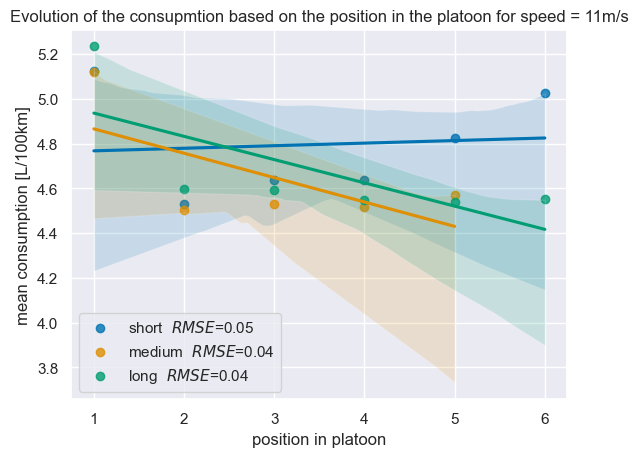

In [12]:
results_path = 'Vehlib_results/consumption/'
fuel_density = 740
vectshort = plot.compute_consumption_regression(results_path,'11','short',fuel_density)
vectmed = plot.compute_consumption_regression(results_path,'11','medium',fuel_density)
vectlong = plot.compute_consumption_regression(results_path,'11','long',fuel_density)
plt.xlabel('position in platoon')
plt.ylabel('mean consumption [L/100km]')
plt.title('Evolution of the consupmtion based on the position in the platoon for speed = 11m/s')
plt.legend()
settings = ['short','medium','long']
null_hypothesis = np.array([exploit.test_null_regression(results_path,'11',k,fuel_density) for k in settings])
df_conso_17_5 = pd.DataFrame({'Short' : vectshort,'Medium':vectmed,'Long':vectlong})
index = pd.Series(['Platoon lenght','alpha','beta','RMSE'])
df_conso_17_5.index = index
df_conso_17_5 = df_conso_17_5.T
df_conso_17_5['null hypothesis RMSE'] = null_hypothesis
df_conso_17_5

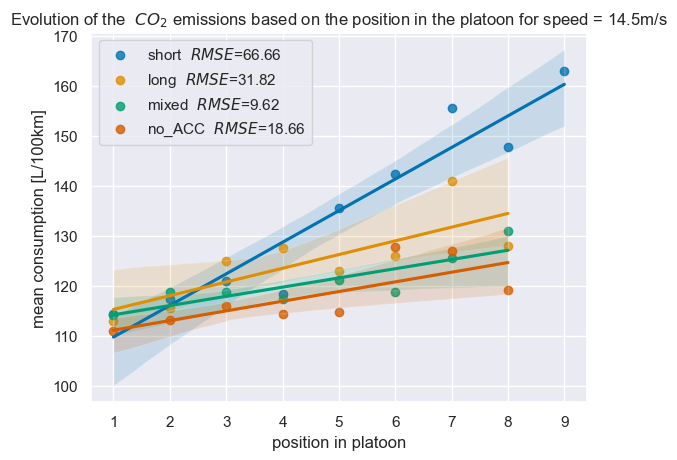

In [7]:
results_path = 'Vehlib_results/consumption/'
MOTH_co2carb = 1.84
vectshort = plot.compute_CO2_regression(results_path,'14_5','short',MOTH_co2carb)
vectlong = plot.compute_CO2_regression(results_path,'14_5','long',MOTH_co2carb)
vectmixed = plot.compute_CO2_regression(results_path,'14_5','mixed',MOTH_co2carb)
vectHDV = plot.compute_CO2_regression(results_path,'14_5','no_ACC',MOTH_co2carb)
plt.xlabel('position in platoon')
plt.ylabel('mean consumption [L/100km]')
plt.title('Evolution of the '+r'$\ CO_2$'+' emissions based on the position in the platoon for speed = 14.5m/s')
plt.legend()


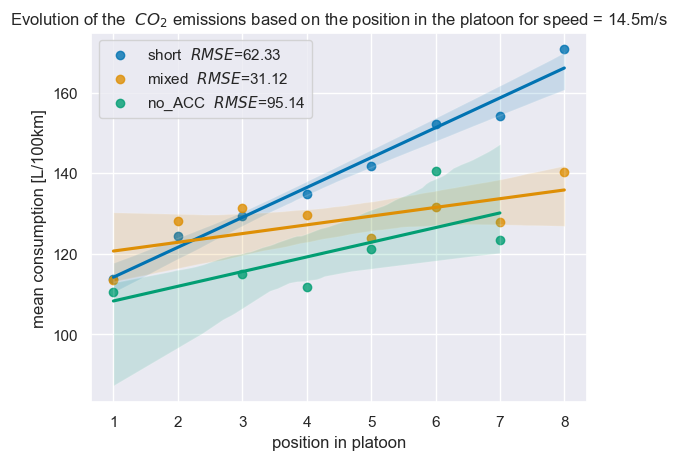

In [9]:
results_path = 'Vehlib_results/consumption/'
MOTH_co2carb = 1.84
vectshort = plot.compute_CO2_regression(results_path,'17_5','short',MOTH_co2carb)
vectmixed = plot.compute_CO2_regression(results_path,'17_5','mixed',MOTH_co2carb)
vectHDV = plot.compute_CO2_regression(results_path,'17_5','no_ACC',MOTH_co2carb)
plt.xlabel('position in platoon')
plt.ylabel('mean consumption [L/100km]')
plt.title('Evolution of the '+r'$\ CO_2$'+' emissions based on the position in the platoon for speed = 17.5m/s')
plt.legend()

## Engine field results

In [80]:
path = 'engine_results/1_test_serie/raw_results/'
out_path = 'engine_results/1_test_serie/analysis_data/'
equivalence_table = pd.read_csv(os.getcwd()+'/engine_results/1_test_serie/equivalence_numero_mesure_fichier_entree.csv', delimiter = ';')
engine.rename_data(path,out_path,equivalence_table)

['long_ACC_1.csv',
 'long_ACC_1_sample_2.csv',
 'long_ACC_1_sample_3.csv',
 'long_ACC_2.csv',
 'long_ACC_2_sample_2.csv',
 'long_ACC_2_sample_3.csv',
 'long_ACC_3.csv',
 'long_ACC_3_sample_2.csv',
 'long_ACC_3_sample_3.csv',
 'long_ACC_4.csv',
 'long_ACC_4_sample_2.csv',
 'long_ACC_4_sample_3.csv',
 'long_ACC_5.csv',
 'long_ACC_5_sample_2.csv',
 'long_ACC_5_sample_3.csv',
 'long_ACC_6.csv',
 'long_ACC_6_sample_2.csv',
 'long_ACC_6_sample_3.csv',
 'long_ACC_7.csv',
 'long_ACC_7_sample_2.csv',
 'long_ACC_7_sample_3.csv',
 'long_ACC_8.csv',
 'long_ACC_8_sample_2.csv',
 'long_ACC_8_sample_3.csv',
 'mixed_1.csv',
 'mixed_1_sample_2.csv',
 'mixed_1_sample_3.csv',
 'mixed_2.csv',
 'mixed_2_sample_2.csv',
 'mixed_2_sample_3.csv',
 'mixed_3.csv',
 'mixed_3_sample_2.csv',
 'mixed_3_sample_3.csv',
 'mixed_4.csv',
 'mixed_4_sample_2.csv',
 'mixed_4_sample_3.csv',
 'mixed_5.csv',
 'mixed_5_sample_2.csv',
 'mixed_5_sample_3.csv',
 'mixed_6.csv',
 'mixed_6_sample_2.csv',
 'mixed_6_sample_3.csv',
 'mi

In [4]:
path = os.getcwd()
results_path = path + '/engine_results/1_test_serie/analysis_data/'
settings = ['short','long','mixed','no_ACC']
MOTH_co2carb = 1.84
veh_list = [[2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10],
            [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,8,8,8,10,10,10,11,11,11],
            [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,9,9,9,10,10,10],
            [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,10,10,10]]
df_results = engine.compute_df_emission_consumption(results_path,settings,MOTH_co2carb,veh_list)

In [5]:
df_results

position in platoon setting  consumption  CO2 emission
0                   2.0   short     4.883442     11.178284
1                   2.0   short     4.803064     10.993546
2                   2.0   short     4.902940     11.222914
3                   3.0   short     5.073599     11.613557
4                   3.0   short     5.039027     11.534420
..                  ...     ...          ...           ...
19                  8.0  no_ACC     5.285756     12.098858
20                  8.0  no_ACC     5.417664     12.401127
21                 10.0  no_ACC     5.308989     12.152369
22                 10.0  no_ACC     5.294932     12.120190
23                 10.0  no_ACC     5.288877     12.106331

[99 rows x 4 columns]

In [61]:
df_results_short = df_results[df_results['setting']=='short']
df_results_short = df_results_short.groupby(['position in platoon'], as_index=False).agg({'consumption':['mean','std']})
df_results_short.columns = ['position in platoon', 'consumption_mean', 'consumption_std']
df_results_short['setting'] = ["short" for k in range(len(df_results_short['position in platoon']))]

df_results_long = df_results[df_results['setting']=='long']
df_results_long = df_results_long.groupby(['position in platoon'], as_index=False).agg({'consumption':['mean','std']})
df_results_long.columns = ['position in platoon', 'consumption_mean', 'consumption_std']
df_results_long['setting'] = ["short" for k in range(len(df_results_long['position in platoon']))]

df_results_mixed = df_results[df_results['setting']=='mixed']
df_results_mixed = df_results_mixed.groupby(['position in platoon'], as_index=False).agg({'consumption':['mean','std']})
df_results_mixed.columns = ['position in platoon', 'consumption_mean', 'consumption_std']
df_results_mixed['setting'] = ["short" for k in range(len(df_results_mixed['position in platoon']))]

df_results_HDV = df_results[df_results['setting']=='no_ACC']
df_results_HDV = df_results_HDV.groupby(['position in platoon'], as_index=False).agg({'consumption':['mean','std']})
df_results_HDV.columns = ['position in platoon', 'consumption_mean', 'consumption_std']
df_results_HDV['setting'] = ["short" for k in range(len(df_results_HDV['position in platoon']))]

df_stats = pd.concat([df_results_short,df_results_long,df_results_mixed,df_results_HDV])
df_stats


position in platoon  consumption_mean  consumption_std setting
0                  2.0          4.829857         0.046406   short
1                  3.0          5.050551         0.019960   short
2                  4.0          5.186454         0.027740   short
3                  5.0          5.135858         0.019493   short
4                  6.0          6.012772         0.067716   short
5                  7.0          6.295778         0.033942   short
6                  8.0          6.756336         0.021173   short
7                  9.0          6.383532         0.023172   short
8                 10.0          7.194117         0.016705   short
0                  2.0          4.747375         0.069892   short
1                  3.0          4.937228         0.004433   short
2                  4.0          5.315201         0.010436   short
3                  5.0          5.490991         0.034384   short
4                  6.0          5.259929         0.052610   short
5                  8.0          5.336396         0.132784   short
6                 10.0          6.051401         0.024964   short
7                 11.0          5.408784         0.087828   short
0                  2.0          4.781774         0.005373   short
1                  3.0          5.007556         0.020643   short
2                  4.0          5.053388         0.086810   short
3                  5.0          4.972805         0.091720   short
4                  6.0          5.214570         0.068558   short
5                  7.0          5.144236         0.063652   short
6                  9.0          5.510020         0.043675   short
7                 10.0          5.802432         0.011931   short
0                  2.0          4.612314         0.073216   short
1                  3.0          4.729731         0.116838   short
2                  4.0          4.972739         0.081469   short
3                  5.0          4.941693         0.020949   short
4                  6.0          4.950835         0.050025   short
5                  7.0          5.437955         0.006803   short
6                  8.0          5.324175         0.066545   short
7                 10.0          5.299618         0.008116   short

0.1533255337472781


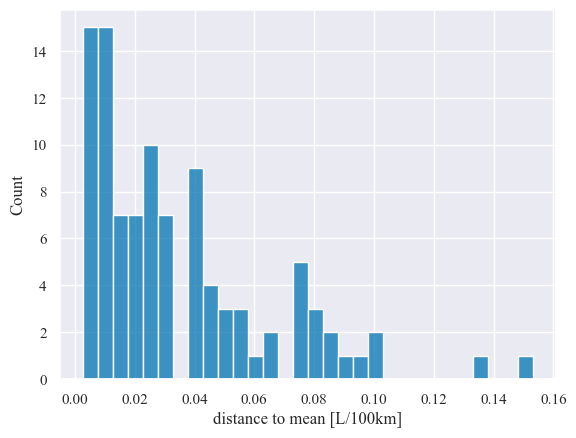

0.6708199023593645 0.45597087474527037


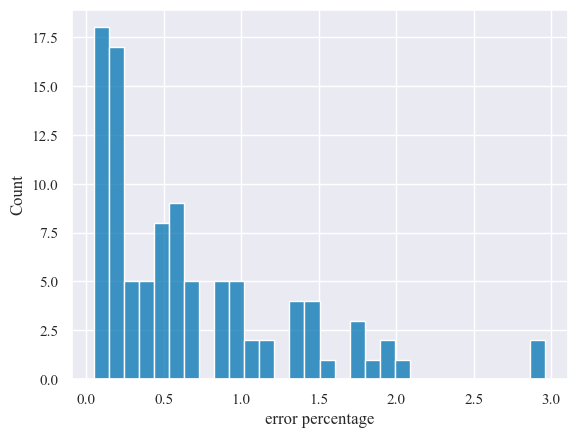

In [63]:
array_stats = []
count = 0
for k in range(len(df_stats['setting'])):
    while count <3 :
        array_stats.append(list(df_stats['consumption_mean'])[k])
        count+=1
    count=0
df_results['mean consumption'] = array_stats

df_results['distance to mean [L/100km]'] = np.abs(df_results['mean consumption']-df_results['consumption'])
df_results['error percentage'] = df_results['distance to mean [L/100km]']/df_results['consumption']*100
sns.histplot(df_results['distance to mean [L/100km]'],bins = 30)
print(max(df_results['distance to mean [L/100km]']))
plt.show()
sns.histplot(df_results['error percentage'],bins = 30)
print(np.mean(df_results['error percentage']),np.median(df_results['error percentage']))

In [153]:
import scipy.stats as stats
df_no_short = df_results[df_results['setting']!='short']
slope, intercept, r_value1, p_value1, std_err1 = stats.linregress(df_no_short['position in platoon'],df_no_short['consumption'])
print('common regression',p_value1)

df_results_HDV = df_results[df_results['setting']=='no_ACC']
slope, intercept, r_value1, p_value2, std_err2 = stats.linregress(df_results_HDV['position in platoon'],df_results_HDV['consumption'])
print('HDV regression',p_value2)

df_results_long = df_results[df_results['setting']=='long']
slope, intercept, r_value1, p_value3, std_err3 = stats.linregress(df_results_long['position in platoon'],df_results_long['consumption'])
print('long setting regression',p_value3)

df_results_mixed = df_results[df_results['setting']=='mixed']
slope, intercept, r_value1, p_value4, std_err4 = stats.linregress(df_results_mixed['position in platoon'],df_results_mixed['consumption'])
print('mixed paltoon regression',p_value4)

print('separated regressions', p_value2*p_value3*p_value4)

common regression 1.7953227024106783e-17
HDV regression 1.307832788104458e-07
long setting regression 2.192349739583859e-05
mixed paltoon regression 1.375146365034801e-10
separated regressions 3.94285661133852e-22


In [48]:
# Load packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load dataset
data = df_results[df_results['setting']=='short']
data.columns = ['position','setting','consumption','CO2_emission']
# Run LMER

md = smf.mixedlm("consumption~position", data, groups=data["position"], re_formula='~position')
mdf = md.fit(method=["lbfgs"])
df = pd.DataFrame(mdf.params)
df.columns = ['values']
df

# Load dataset
data = df_results[df_results['setting']=='long']
data.columns = ['position','setting','consumption','CO2_emission']
# Run LMER

md = smf.mixedlm("consumption~position", data, groups=data["position"], re_formula='~position')
mdf = md.fit(method=["lbfgs"])
df = pd.DataFrame(mdf.params)
df.columns = ['values']
df

# Load dataset
data = df_results[df_results['setting']=='mixed']
data.columns = ['position','setting','consumption','CO2_emission']
# Run LMER

md = smf.mixedlm("consumption~position", data, groups=data["position"], re_formula='~position')
mdf = md.fit(method=["lbfgs"])
df = pd.DataFrame(mdf.params)
df.columns = ['values']
df

# Load dataset
data = df_results[df_results['setting']=='no_ACC']
data.columns = ['position','setting','consumption','CO2_emission']
# Run LMER

md = smf.mixedlm("consumption~position", data, groups=data["position"], re_formula='~position')
mdf = md.fit(method=["lbfgs"])
df = pd.DataFrame(mdf.params)
df.columns = ['values']
df

/Users/thibault.charlottin/opt/anaconda3/envs/phD_data_Analysis/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


values
Intercept             4.243384
position              0.267906
Group Var             0.001824
Group x position Cov -0.005320
position Var          1.769925

In [34]:
# Load packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load dataset
data = df_results[df_results['setting']!='short']
data.columns = ['position','setting','consumption','CO2_emission']
# Run LMER
data["grp"] = data["setting"].astype(str) + data["position"].astype(str)
md = smf.mixedlm("consumption~position", data, groups=data["grp"], re_formula='~position')
mdf = md.fit(method=["lbfgs"])

print(mdf.summary())

position setting  consumption  CO2_emission
0        2.0    long     4.666670     10.682089
1        2.0    long     4.787727     10.959190
2        2.0    long     4.787727     10.959190
3        3.0    long     4.942346     11.313116
4        3.0    long     4.934668     11.295541
..       ...     ...          ...           ...
19       8.0  no_ACC     5.285756     12.098858
20       8.0  no_ACC     5.285756     12.098858
21      10.0  no_ACC     5.308989     12.152369
22      10.0  no_ACC     5.294932     12.120190
23      10.0  no_ACC     5.294932     12.120190

[72 rows x 4 columns]

/var/folders/mq/cjj_sp3148z4splt8wm1sp2hkxk65b/T/ipykernel_73633/1005763707.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["grp"] = data["setting"].astype(str) + data["position"].astype(str)


            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  consumption
No. Observations:    72       Method:              REML       
No. Groups:          24       Scale:               0.0040     
Min. group size:     3        Log-Likelihood:      52.4068    
Max. group size:     3        Converged:           Yes        
Mean group size:     3.0                                      
--------------------------------------------------------------
                     Coef. Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            4.563    0.103 44.458 0.000  4.362  4.764
position             0.106    0.018  5.755 0.000  0.070  0.142
Group Var            0.006    0.953                           
Group x position Cov 0.002    0.176                           
position Var         0.000    0.029                           



/Users/thibault.charlottin/opt/anaconda3/envs/phD_data_Analysis/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/thibault.charlottin/opt/anaconda3/envs/phD_data_Analysis/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
students = [k for k in range(1, 36)]
notes = [1,2,3,4]


/Users/thibault.charlottin/opt/anaconda3/envs/phD_data_Analysis/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Text(34.000000000000014, 0.5, 'consumption [L/100km]')

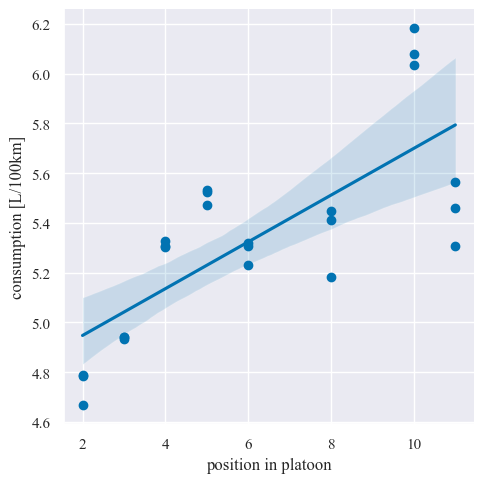

In [84]:
# Load dataset


data = df_results[df_results['setting']=='long']
data.columns = ['position','setting','consumption','CO2_emission']
# Run LMER

md = smf.mixedlm("consumption~position", data, groups=data["position"], re_formula='~position')
mdf = md.fit()


performance = pd.DataFrame()
performance["consumption"] = mdf.resid.values
performance["position"] = data.position
performance["predicted"] = mdf.fittedvalues

sns.lmplot(x = "position", y = "predicted",scatter=False, data = performance)
plt.scatter(data['position'],data['consumption'])
plt.xlabel('position in platoon')
plt.ylabel('consumption [L/100km]')

In [27]:
data = df_results[df_results['setting']=='mixed']
data.columns = ['position','setting','consumption','CO2_emission']
# Run LMER

md = smf.mixedlm("consumption~position", data, groups=data["position"], re_formula='~position')
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())



            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  consumption
No. Observations:    24       Method:              REML       
No. Groups:          8        Scale:               0.0034     
Min. group size:     3        Log-Likelihood:      19.7844    
Max. group size:     3        Converged:           Yes        
Mean group size:     3.0                                      
--------------------------------------------------------------
                     Coef. Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            4.614    0.181 25.458 0.000  4.258  4.969
position             0.099    0.042  2.366 0.018  0.017  0.181
Group Var            0.001    1.377                           
Group x position Cov 0.000    0.314                           
position Var         0.000    0.060                           



/Users/thibault.charlottin/opt/anaconda3/envs/phD_data_Analysis/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [26]:
data = df_results[df_results['setting']=='no_ACC']
data.columns = ['position','setting','consumption','CO2_emission']
# Run LMER

md = smf.mixedlm("consumption~position", data, groups=data["position"], re_formula='~position')
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   consumption
No. Observations:    24        Method:               REML       
No. Groups:          8         Scale:                0.0040     
Min. group size:     3         Log-Likelihood:       18.1446    
Max. group size:     3         Converged:            Yes        
Mean group size:     3.0                                        
----------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept             4.386    0.041 107.799 0.000  4.306  4.465
position              0.118    0.015   7.705 0.000  0.088  0.148
Group Var             0.003    0.371                            
Group x position Cov -0.002    0.120                            
position Var          0.001    0.032                            



/Users/thibault.charlottin/opt/anaconda3/envs/phD_data_Analysis/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/thibault.charlottin/opt/anaconda3/envs/phD_data_Analysis/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


/Users/thibault.charlottin/opt/anaconda3/envs/phD_data_Analysis/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/thibault.charlottin/opt/anaconda3/envs/phD_data_Analysis/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/thibault.charlottin/opt/anaconda3/envs/phD_data_Analysis/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/thibault.charlottin/opt/anaconda3/envs/phD_data_Analysis/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
 

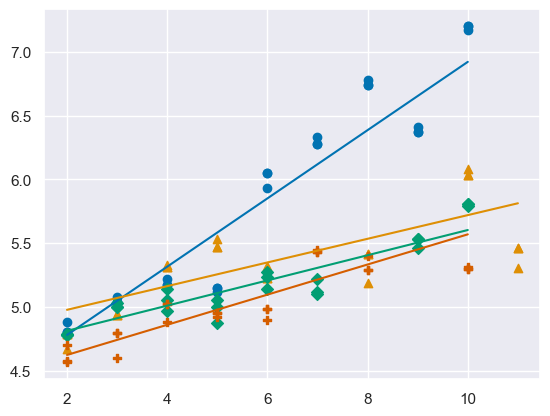

In [55]:
import itertools
path = os.getcwd()
results_path = path + '/engine_results/1_test_serie/analysis_data/'
setting_list = ['short','long','mixed','no_ACC']
markers = ['o','^','D','P']
MOTH_co2carb = 1.84
veh_list = [[2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10],
            [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,8,8,8,10,10,10,11,11,11],
            [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,9,9,9,10,10,10],
            [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,10,10,10]]   
df = engine.compute_df_emission_consumption(results_path,settings,MOTH_co2carb,veh_list)
palette = itertools.cycle(sns.color_palette())
for k in range(len(setting_list)): 
    color = next(palette)
    data = df[df['setting']==setting_list[k]]
    data.columns = ['position','setting','consumption','CO2_emission']
    md = smf.mixedlm("consumption~position", data, groups=data["position"], re_formula='~position')
    mdf = md.fit(method=["lbfgs"])
    plt.scatter(data['position'],data['consumption'],marker = markers[k],label = str(setting_list[k]), color = color)
    reg = pd.DataFrame(mdf.params)
    reg.columns = ['values']
    plt.plot(pd.unique(data["position"]),[reg['values']['Intercept']+ reg['values']['position']*k for k in pd.unique(data["position"])], color = color)

In [54]:
[reg['values']['Intercept']+ reg['values']['position']*k for k in pd.unique(data["position"])]

[4.6222186626303,
 4.740538483547942,
 4.858858304465583,
 4.977178125383225,
 5.095497946300867,
 5.213817767218508,
 5.33213758813615,
 5.568777229971433]

In [10]:
def plot_consumption_regression_engine(results_path,setting_list,MOTH_co2carb,marker_style_list,veh_list, label_list):
    """plot consumption vs position in platton linear regression using Engine experiments results"""

    df = engine.compute_df_emission_consumption(results_path,setting_list,MOTH_co2carb,veh_list)
    palette = itertools.cycle(sns.color_palette())
    for k in range(len(setting_list)): 
        data = df[df['setting']==setting_list[k]]
        data.columns = ['position','setting','consumption','CO2_emission']
        # Run LMER

        md = smf.mixedlm("consumption~position", data, groups=data["position"], re_formula='~position')
        mdf = md.fit()

        c = next(palette)
        performance = pd.DataFrame()
        performance["consumption"] = mdf.resid.values
        performance["position"] = data.position
        performance["predicted"] = mdf.fittedvalues
        
        sns.lmplot(x = "position", y = "predicted",scatter=False, data = performance)
        plt.scatter(data['position'],data['consumption'], marker = marker_style_list[k], color = c, label = label_list[k])
    return

/Users/thibault.charlottin/opt/anaconda3/envs/phD_data_Analysis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/thibault.charlottin/opt/anaconda3/envs/phD_data_Analysis/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/thibault.charlottin/opt/anaconda3/envs/phD_data_Analysis/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/thibault.charlottin/opt/anaconda3/envs/phD_data_Analysis/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, Con

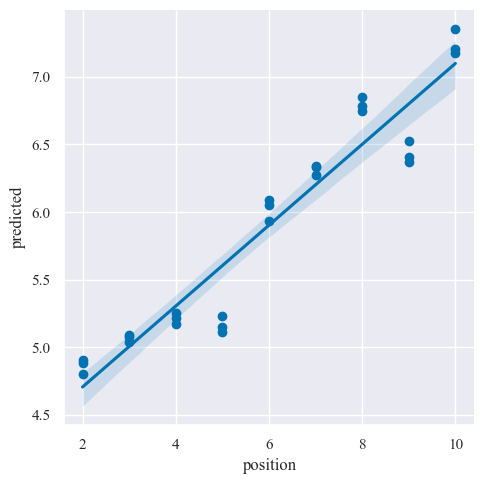

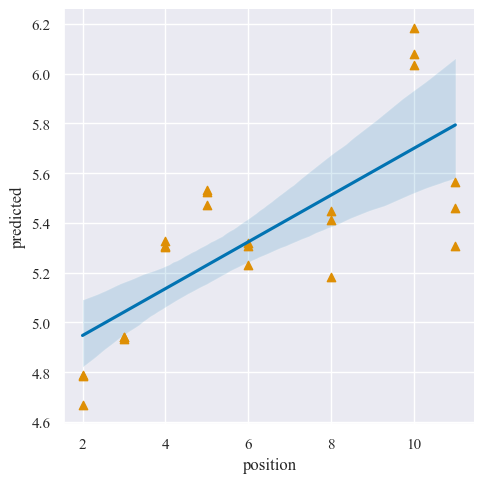

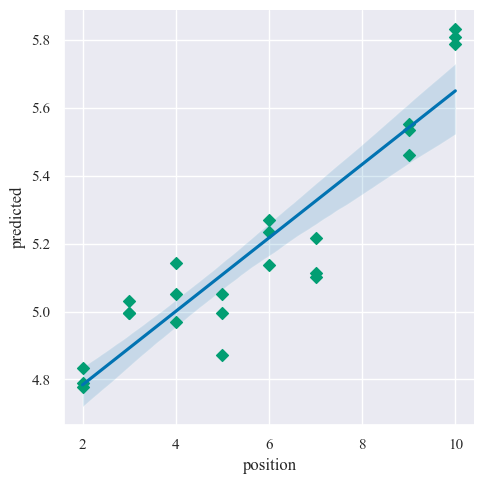

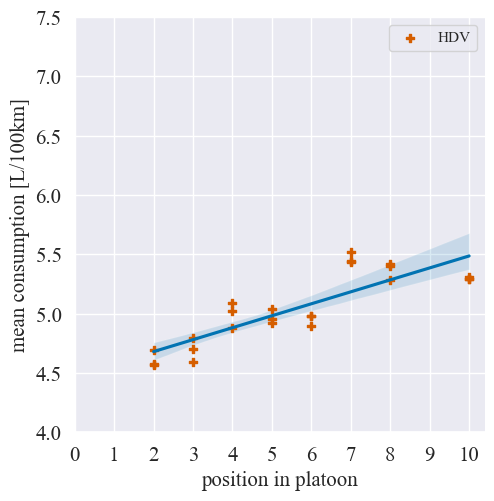

In [13]:
path = os.getcwd()
import itertools
import statsmodels.api as sm
import statsmodels.formula.api as smf
results_path = path + '/engine_results/1_test_serie/analysis_data/'
settings = ['short','long','mixed','no_ACC']
markers = ['o','^','D','P']
labels = ['short','long','mixed','HDV']
MOTH_co2carb = 1.84
veh_list = [[2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10],
            [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,8,8,8,10,10,10,11,11,11],
            [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,9,9,9,10,10,10],
            [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,10,10,10]]
plot_consumption_regression_engine(results_path,settings,MOTH_co2carb,markers,veh_list,labels)
plt.xticks([k for k in range(0,11)], size = 15)
plt.yticks([4,4.5,5,5.5,6,6.5,7,7.5],size = 15)
plt.xlabel('position in platoon', size = 15)
plt.ylabel('mean consumption [L/100km]', size = 15)
plt.legend()

In [99]:
path = os.getcwd()
results_path = path + '/engine_results/1_test_serie/analysis_data/'
settings = ['short','long','mixed','HDV']
markers = ['o','^','D','P']
MOTH_co2carb = 1.84
veh_list = [[2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10],
            [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,8,8,8,10,10,10,11,11,11],
            [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,9,9,9,10,10,10],
            [2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,10,10,10]]
plot.plot_emission_regression_engine(results_path,settings,MOTH_co2carb,markers,veh_list)
plt.xlabel('position in platoon', size = 15)
plt.ylabel('CO2 emission [g]', size = 15)
plt.title('Evolution of the '+r'$\ CO_2$'+' emissions \n based on the position in the platoon', size = 18)
plt.legend()
#check with Bruno for MOTH_CO2_carb value

ValueError: All arrays must be of the same length

## Analysis on how often does this specific situation might happen in traffic

### Characterisaiton of the acceleration/decceleration phase

In [9]:
from tqdm.notebook import trange
def count_time(path):
    files = os.listdir(path)
    total_time = 0
    for f in trange(len(files)) : 
        df = pd.read_csv(path+files[f])
        ids = list(pd.unique(df['id']))
        for id in ids : 
            df_test = df[df['id']==id]
            total_time +=  max(list(df_test['time']))-list(df_test['time'])[0]
    return total_time
total_time_HighD = count_time("HighD_corrected_data/")
total_time_HighD

  0%|          | 0/59 [00:00<?, ?it/s]

39267489.0

In [10]:
total_time_ExiD = count_time("ExiD_corrected_data/")
print(total_time_HighD+total_time_ExiD)

  0%|          | 0/54 [00:00<?, ?it/s]

57086544.0


In [12]:
print(((total_time_HighD+total_time_ExiD)/3.6)/1250)

12685.898666666666


(0.0, 16.0)

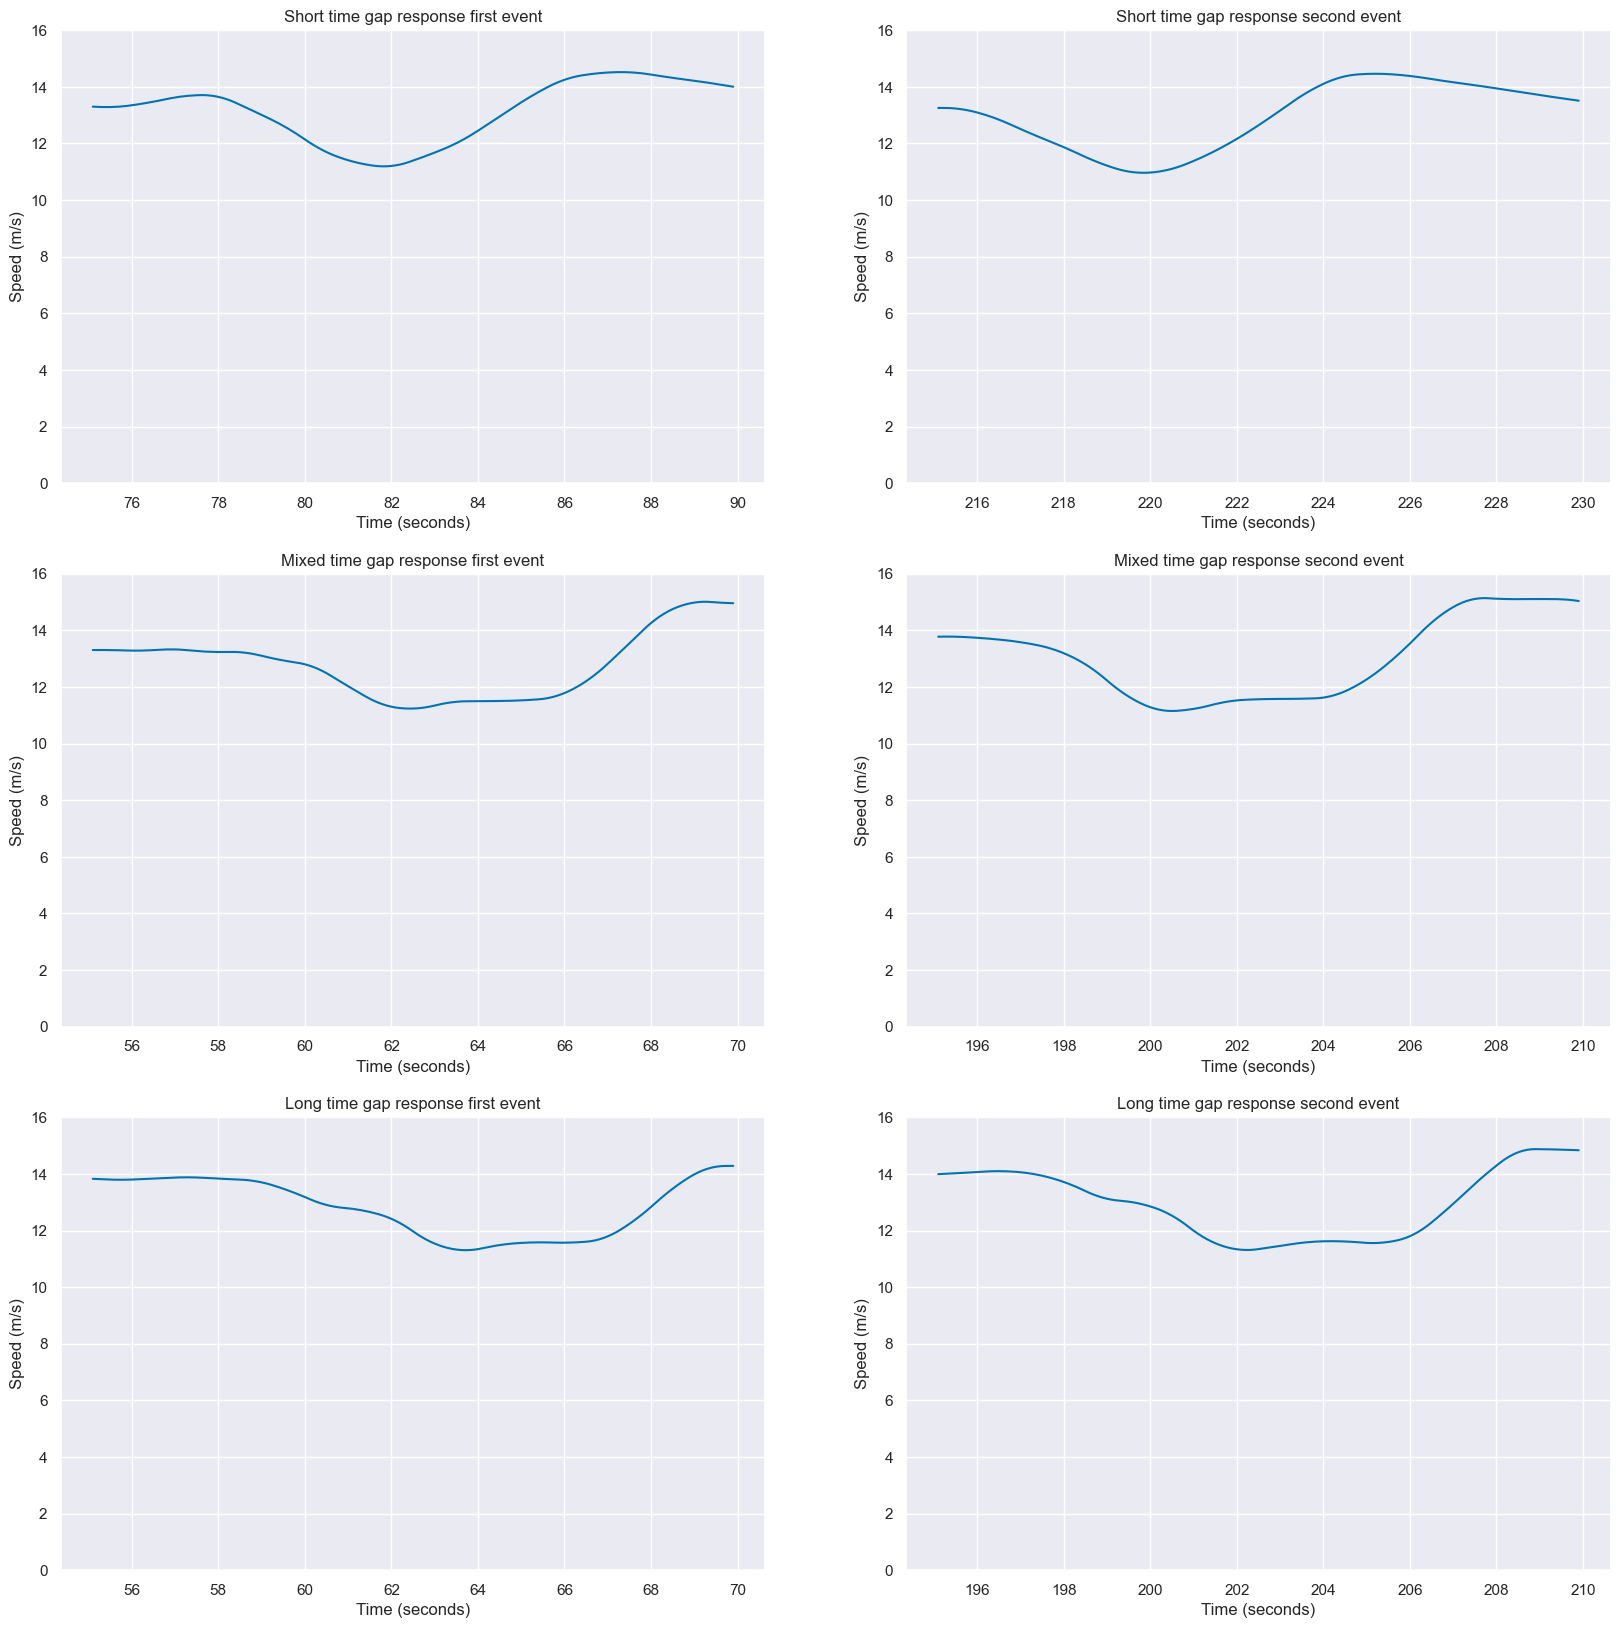

In [3]:
#determining the scope of the phase and the specific time gap
Leader_data_short = pd.read_csv('individual_trajectories/short_time_gap_14_5ms_Veh_nb_1.csv')
Leader_data_mixed = pd.read_csv('individual_trajectories/mixed_time_gap_14_5ms_Veh_nb_1.csv')
Leader_data_long = pd.read_csv('individual_trajectories/long_time_gap_14_5ms_Veh_nb_1.csv')


first_event_short = Leader_data_short[(Leader_data_short['Time']<90) &  (Leader_data_short['Time']>75)]
second_event_short = Leader_data_short[(Leader_data_short['Time']>215) &  (Leader_data_short['Time']<230)]

first_event_mixed = Leader_data_mixed[(Leader_data_mixed['Time']<70) &  (Leader_data_mixed['Time']>55)]
second_event_mixed = Leader_data_mixed[(Leader_data_mixed['Time']>195) &  (Leader_data_mixed['Time']<210)]

first_event_long = Leader_data_long[(Leader_data_long['Time']>55) &  (Leader_data_long['Time']<70)]
second_event_long = Leader_data_long[(Leader_data_long['Time']>195) &  (Leader_data_long['Time']<210)]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

ax[0,0].plot(first_event_short['Time'],first_event_short['Speed'])
ax[0,0].set_xlabel('Time (seconds)')
ax[0,0].set_ylabel('Speed (m/s)')
ax[0,0].set_ylim([0,16])
ax[0,0].set_title('Short time gap response first event')
ax[0,1].plot(second_event_short['Time'],second_event_short['Speed'])
ax[0,1].set_title('Short time gap response second event')
ax[0,1].set_xlabel('Time (seconds)')
ax[0,1].set_ylabel('Speed (m/s)')
ax[0,1].set_ylim([0,16])

ax[1,0].plot(first_event_mixed['Time'],first_event_mixed['Speed'])
ax[1,0].set_title('Mixed time gap response first event')
ax[1,0].set_xlabel('Time (seconds)')
ax[1,0].set_ylabel('Speed (m/s)')
ax[1,0].set_ylim([0,16])
ax[1,1].plot(second_event_mixed['Time'],second_event_mixed['Speed'])
ax[1,1].set_title('Mixed time gap response second event')
ax[1,1].set_xlabel('Time (seconds)')
ax[1,1].set_ylabel('Speed (m/s)')
ax[1,1].set_ylim([0,16])

ax[2,0].plot(first_event_long['Time'],first_event_long['Speed'])
ax[2,0].set_title('Long time gap response first event')
ax[2,0].set_xlabel('Time (seconds)')
ax[2,0].set_ylabel('Speed (m/s)')
ax[2,0].set_ylim([0,16])
ax[2,1].plot(second_event_long['Time'],second_event_long['Speed'])
ax[2,1].set_title('Long time gap response second event')
ax[2,1].set_xlabel('Time (seconds)')
ax[2,1].set_ylabel('Speed (m/s)')
ax[2,1].set_ylim([0,16])

In [4]:
Characterization_df = pd.DataFrame()
path = os.getcwd()+'/individual_trajectories/'
traj_names = ['short_time_gap_14_5ms_Veh_nb_1.csv','short_time_gap_14_5ms_Veh_nb_1.csv','long_time_gap_14_5ms_Veh_nb_1.csv',
              'long_time_gap_14_5ms_Veh_nb_1.csv','mixed_time_gap_14_5ms_Veh_nb_1.csv','mixed_time_gap_14_5ms_Veh_nb_1.csv']
out_names = ['short_1','short_2','long_1','long_2','mixed_1','mixed_2']
time_in_list = [75,215,55,195,55,195]
time_out_list = [90,230,70,210,70,210]
for k in range(len(traj_names)):
    array = extract.characterize_singular_event(path,traj_names[k],time_in_list[k],time_out_list[k])
    Characterization_df[out_names[k]] = array
index = np.array(['dv1 (m/s)','dt1 (s)','dv2 (m/s)','dt2 (s)'])
Characterization_df = Characterization_df.set_index(index)

In [5]:
Characterization_df

short_1   short_2    long_1    long_2   mixed_1   mixed_2
dv1 (m/s) -2.50996 -2.283546 -2.566737 -2.775418 -2.085447 -2.622545
dt1 (s)    4.10000  4.500000  6.300000  5.600000  5.400000  5.100000
dv2 (m/s)  3.32916  3.497504  2.977880  3.561804  3.773081  3.987709
dt2 (s)    5.50000  5.400000  6.200000  6.700000  6.900000  7.200000

In [6]:
#extracting the mean values
mean_array = extract.characterize_mean_event(path,traj_names,time_in_list,time_out_list)
mean_df = pd.DataFrame(mean_array)
index = np.array(['dv1 (m/s)','dt1 (s)','dv2 (m/s)','dt2 (s)'])
mean_df = mean_df.set_index(index)
mean_df

0
dv1 (m/s) -2.473942
dt1 (s)    5.166667
dv2 (m/s)  3.521190
dt2 (s)    6.316667

In [7]:
#analyzing mean speed for every reccord

path_HighD= 'HighD_corrected_data/'
files = sorted(os.listdir(path_HighD))
speedlist_highD = []
for k in files :
    df = pd.read_csv(path_HighD+k)
    speedlist_highD.append(np.mean(np.abs(df['x_speed']+df['yspeed'])))
HighD_speed = pd.DataFrame({'name':files,'mean speed':speedlist_highD})
HighD_speed.to_csv('HighD mean speed.csv')

path_ExiD= 'ExiD_corrected_data/'
files = sorted(os.listdir(path_ExiD))
speedlist_ExiD = []
for k in files :
    df = pd.read_csv(path_ExiD+k)
    speedlist_ExiD.append(np.mean(np.abs(df['x_speed']+df['yspeed'])))
ExiD_speed = pd.DataFrame({'name':files,'mean speed':speedlist_ExiD})
ExiD_speed.to_csv('ExiD mean speed.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/HighD/corrected_data/'

In [48]:
HighD_speed = pd.read_csv('HighD mean speed.csv')
ExiD_speed = pd.read_csv('ExiD mean speed.csv')

In [54]:
ExiD_speed

Unnamed: 0           name  mean speed
0            0   0_tracks.csv    9.774408
1            1  10_tracks.csv    5.374746
2            2  11_tracks.csv    5.430195
3            3  12_tracks.csv    5.186045
4            4  13_tracks.csv    5.518949
5            5  14_tracks.csv    5.541639
6            6  15_tracks.csv    5.515543
7            7  16_tracks.csv    5.550940
8            8  17_tracks.csv    5.444776
9            9  18_tracks.csv    4.849033
10          10  19_tracks.csv   22.022709
11          11   1_tracks.csv    9.838668
12          12  20_tracks.csv   22.271596
13          13  21_tracks.csv   21.826563
14          14  22_tracks.csv   22.669100
15          15  23_tracks.csv   22.317736
16          16  24_tracks.csv   26.835488
17          17  25_tracks.csv   26.496076
18          18  26_tracks.csv   26.904077
19          19  27_tracks.csv   26.256710
20          20  28_tracks.csv   26.741174
21          21  29_tracks.csv   27.973622
22          22   2_tracks.csv    9.922309
23          23  30_tracks.csv   26.705238
24          24  31_tracks.csv   26.727327
25          25  32_tracks.csv   27.169279
26          26  33_tracks.csv   27.056499
27          27  34_tracks.csv   26.762104
28          28  35_tracks.csv   27.103611
29          29  36_tracks.csv   26.294166
30          30  37_tracks.csv   26.563056
31          31  38_tracks.csv   27.685245
32          32  39_tracks.csv   37.061895
33          33   3_tracks.csv    9.737118
34          34  40_tracks.csv   38.119820
35          35  41_tracks.csv   38.758128
36          36  42_tracks.csv   38.278993
37          37  43_tracks.csv   38.630023
38          38  44_tracks.csv   37.651248
39          39  45_tracks.csv   37.896900
40          40  46_tracks.csv   38.729751
41          41  47_tracks.csv   37.937283
42          42  48_tracks.csv   39.501539
43          43  49_tracks.csv   39.086290
44          44   4_tracks.csv    9.789845
45          45  50_tracks.csv   36.613107
46          46  51_tracks.csv   37.666244
47          47  52_tracks.csv   37.976674
48          48  53_tracks.csv    9.265669
49          49   5_tracks.csv    9.817683
50          50   6_tracks.csv    9.822597
51          51   7_tracks.csv    5.522784
52          52   8_tracks.csv    5.615112
53          53   9_tracks.csv    4.600913

In [67]:
HighD_mean = []
ExiD_mean = []
path_HighD = 'HighD_corrected_data/'
path_ExiD = 'ExiD_corrected_data/'
HighD_files = os.listdir(path_HighD)
ExiD_files = os.listdir(path_ExiD)
for k in HighD_files : 
    df = pd.read_csv(path_HighD+k)
    df = df.groupby('id').mean()
    for k in list(df['x_speed']):
        HighD_mean.append(np.abs(k))
for k in ExiD_files : 
    df = pd.read_csv(path_ExiD+k)
    df = df.groupby('id').mean()
    for k in list(df['x_speed']):
        ExiD_mean.append(np.abs(k))



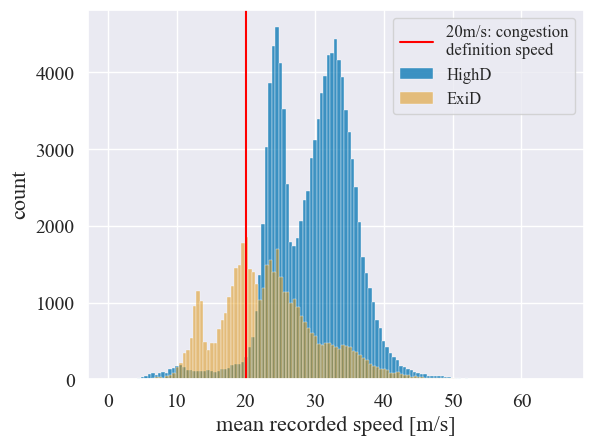

In [69]:

sns.histplot(HighD_mean,binwidth= 0.5,label = 'HighD')
sns.histplot(ExiD_mean,binwidth= 0.5,alpha = 0.5, label = 'ExiD')
plt.axvline(x=20, color = 'red', label = '20m/s: congestion\ndefinition speed')
plt.xticks(size = 14);plt.yticks(size = 14)
plt.xlabel('mean recorded speed [m/s]',size = 16);plt.ylabel('count',size = 16)
plt.legend( fontsize="12", loc = 'upper right')
#plt.title('Mean speed distrbution: HighD and ExiD', size = 18)


Text(0.5, 1.0, 'Mean speed distrbution: HighD and ExiD')

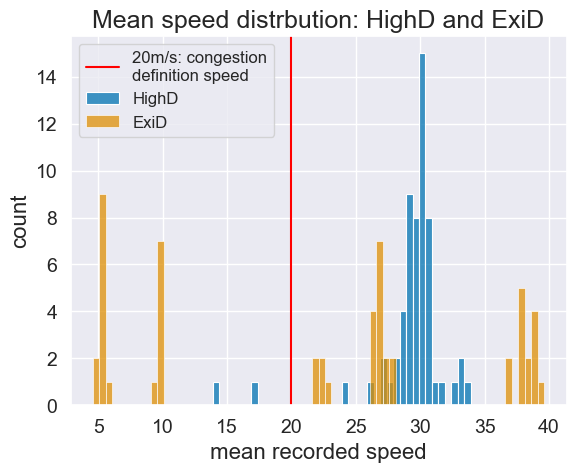

In [89]:
sns.histplot(HighD_speed['mean speed'],binwidth= 0.5,label = 'HighD')
sns.histplot(ExiD_speed['mean speed'],binwidth= 0.5, label = 'ExiD')
plt.axvline(x=20, color = 'red', label = '20m/s: congestion\ndefinition speed')
plt.xticks(size = 14);plt.yticks(size = 14)
plt.xlabel('mean recorded speed [m/s]',size = 16);plt.ylabel('count',size = 16)
plt.legend( fontsize="12", loc = 'upper left')
plt.title('Mean speed distrbution: HighD and ExiD', size = 18)

In [9]:
HighD_speed_selection = HighD_speed[HighD_speed['mean speed']<20]
ExiD_speed_selection = ExiD_speed[ExiD_speed['mean speed']<20]

In [10]:
HighD_speed_selection

Unnamed: 0           name  mean speed
23          23  24_tracks.csv   13.899990
24          24  25_tracks.csv   16.994207

In [11]:
ExiD_speed_selection

Unnamed: 0           name  mean speed
0            0   0_tracks.csv    9.774408
1            1  10_tracks.csv    5.374746
2            2  11_tracks.csv    5.430195
3            3  12_tracks.csv    5.186045
4            4  13_tracks.csv    5.518949
5            5  14_tracks.csv    5.541639
6            6  15_tracks.csv    5.515543
7            7  16_tracks.csv    5.550940
8            8  17_tracks.csv    5.444776
9            9  18_tracks.csv    4.849033
11          11   1_tracks.csv    9.838668
22          22   2_tracks.csv    9.922309
33          33   3_tracks.csv    9.737118
44          44   4_tracks.csv    9.789845
48          48  53_tracks.csv    9.265669
49          49   5_tracks.csv    9.817683
50          50   6_tracks.csv    9.822597
51          51   7_tracks.csv    5.522784
52          52   8_tracks.csv    5.615112
53          53   9_tracks.csv    4.600913

In [12]:
mean_value,std_err = extract.get_mean_distance(path,traj_names,time_in_list,time_out_list)
print(mean_value,std_err)

1.6785543953406603 0.7013941217419557


In [ ]:
path_HighD= 'comparison_datasets/'
tau = 5
time_window = 15
proportions_out = HighD.running_all_datasets (path_HighD,tau,time_window,
                         path,traj_names,time_in_list,time_out_list,
                         mean_value, std_err)

In [15]:
proportions_out_mean = np.round(np.mean(proportions_out),4)
proportions_out_mean

0.0008

In [210]:
def adapt_to_congestion(df_results,setting,treiber_value_congestion):
    df = df_results[df_results['setting']==setting]
    df = df.groupby('position in platoon').mean()
    treiber_ratio = treiber_value_congestion/list(df['consumption'])[0]
    change_list = [treiber_value_congestion]
    for k in range(1,len(df['consumption'])):
        change_list.append(change_list[k-1]+(list(df['consumption'])[k]-list(df['consumption'])[k-1])*treiber_ratio)
    df['Treiber consumption'] = change_list
    df['position in platoon'] = df.index
    return df

In [211]:
treiber_value_congestion = 14.7

df_short_treiber = adapt_to_congestion(df_results,'short',treiber_value_congestion)
df_long_treiber = adapt_to_congestion(df_results,'long',treiber_value_congestion)
df_mixed_treiber = adapt_to_congestion(df_results,'mixed',treiber_value_congestion)
df_HDV_treiber = adapt_to_congestion(df_results,'no_ACC',treiber_value_congestion)

/var/folders/mq/cjj_sp3148z4splt8wm1sp2hkxk65b/T/ipykernel_4275/3654239783.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('position in platoon').mean()
/var/folders/mq/cjj_sp3148z4splt8wm1sp2hkxk65b/T/ipykernel_4275/3654239783.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('position in platoon').mean()
/var/folders/mq/cjj_sp3148z4splt8wm1sp2hkxk65b/T/ipykernel_4275/3654239783.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select onl

In [ ]:
14.7+

In [214]:
df_HDV_treiber

consumption  CO2 emission  Treiber consumption  \
position in platoon                                                   
2.0                     4.612314     10.606131            14.700000   
3.0                     4.697320     10.850746            14.970924   
4.0                     4.995685     11.486911            15.921850   
5.0                     4.970523     11.429535            15.841653   
6.0                     4.952109     11.381572            15.782967   
7.0                     5.466671     12.513136            17.422938   
8.0                     5.368145     12.287667            17.108923   
10.0                    5.297599     12.126297            16.884087   

                     position in platoon  
position in platoon                       
2.0                                  2.0  
3.0                                  3.0  
4.0                                  4.0  
5.0                                  5.0  
6.0                                  6.0  
7.0                                  7.0  
8.0                                  8.0  
10.0                                10.0

In [201]:
def compute_impact(df_consumption,platoon_lenght,setting,event_occurence, classic_consumption):
    df = df_consumption[df_consumption['position in platoon']<= platoon_lenght]
    return (np.mean(df['Treiber consumption'])-classic_consumption)*event_occurence+ classic_consumption

In [215]:
platoon_lenghts = []
short = compute_impact(df_short_treiber,10,"short",0.0008,treiber_value_congestion)
long = compute_impact(df_long_treiber,10,"long",0.0008,treiber_value_congestion)
mixed = compute_impact(df_mixed_treiber,10,"mixed",0.0008,treiber_value_congestion)
HDV = treiber_value_congestion
print(short,long,mixed,HDV)
print(short/HDV,long/HDV,mixed/HDV)

14.702513380026355 14.701423804087979 14.700954322339964 14.7
1.0001709782330854 1.000096857420951 1.0000649198870724


In [219]:
print('percentage short', (short/HDV-1))
print('percentage long', (long/HDV-1))
print('percentage mixed', (mixed/HDV-1))

percentage short 0.00017097823308542814
percentage long 9.685742095100203e-05
percentage mixed 6.491988707235663e-05


# leaders analysis

In [ ]:
short_time_window = [1700,2018]

/var/folders/mq/cjj_sp3148z4splt8wm1sp2hkxk65b/T/ipykernel_8725/3560679433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short_leader['Time'] = df_short_leader['Time']-ref_time


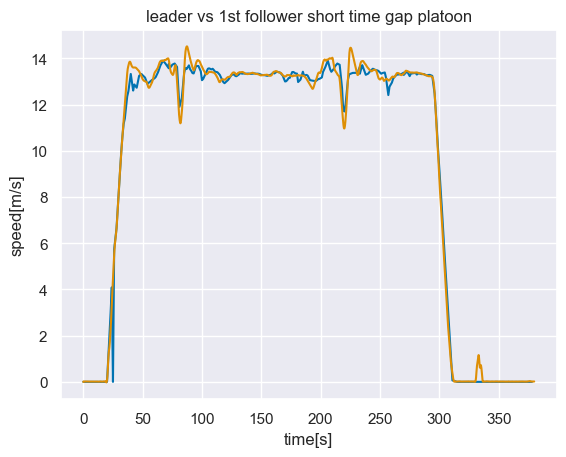

(10.0, 15.0)

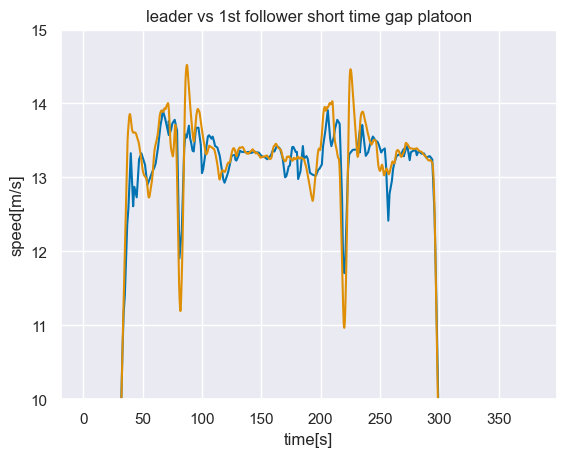

In [94]:
df2 = pd.read_csv('data/leaders/test2_tracker.csv')
df_short_leader = df2[(df2['Time']>1700) & (df2['Time']<2080)]
ref_time = min(df_short_leader['Time'])
df_short_leader['Time'] = df_short_leader['Time']-ref_time
df_short_platoon = pd.read_csv('data_for_engine/short_time_gap_14_5ms.csv')
plt.plot(df_short_leader['Time'],df_short_leader['speed'])
plt.plot(df_short_platoon['Time'],df_short_platoon['Speed2'])
plt.xlabel('time[s]');plt.ylabel('speed[m/s]');plt.title('leader vs 1st follower short time gap platoon')
plt.show()
plt.plot(df_short_leader['Time'],df_short_leader['speed'])
plt.plot(df_short_platoon['Time'],df_short_platoon['Speed2'])
plt.xlabel('time[s]');plt.ylabel('speed[m/s]');plt.title('leader vs 1st follower short time gap platoon')
plt.ylim([10,15])

/var/folders/mq/cjj_sp3148z4splt8wm1sp2hkxk65b/T/ipykernel_8725/1104530176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short_leader['Time'] = df_short_leader['Time']-ref_time


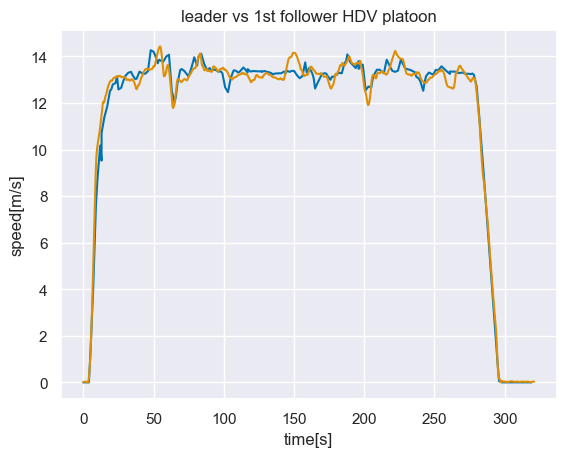

(10.0, 15.0)

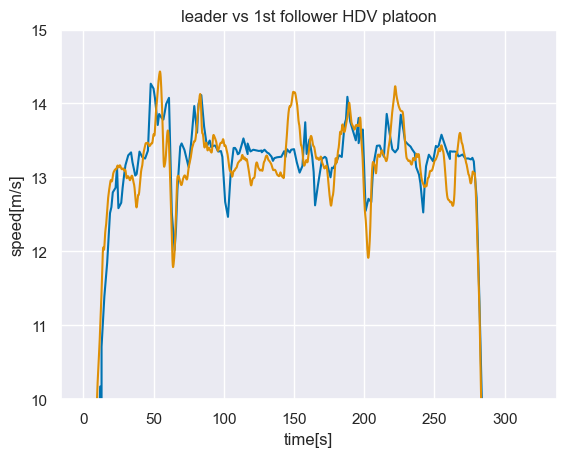

In [98]:
df2 = pd.read_csv('data/leaders/test3_tracker.csv')
df_short_leader = df2[(df2['Time']>10995) & (df2['Time']<11316)]
ref_time = min(df_short_leader['Time'])
df_short_leader['Time'] = df_short_leader['Time']-ref_time
df_short_platoon = pd.read_csv('data_for_engine/no_ACC_time_gap_14_5ms.csv')
plt.plot(df_short_leader['Time'],df_short_leader['speed'])
plt.plot(df_short_platoon['Time'],df_short_platoon['Speed2'])
plt.xlabel('time[s]');plt.ylabel('speed[m/s]');plt.title('leader vs 1st follower HDV platoon')
plt.show()
plt.plot(df_short_leader['Time'],df_short_leader['speed'])
plt.plot(df_short_platoon['Time'],df_short_platoon['Speed2'])
plt.xlabel('time[s]');plt.ylabel('speed[m/s]');plt.title('leader vs 1st follower HDV platoon')
plt.ylim([10,15])

/var/folders/mq/cjj_sp3148z4splt8wm1sp2hkxk65b/T/ipykernel_8725/159719312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short_leader['Time'] = df_short_leader['Time']-ref_time


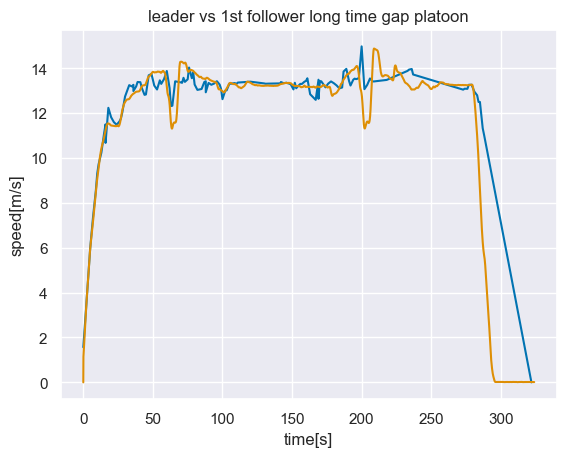

(10.0, 15.0)

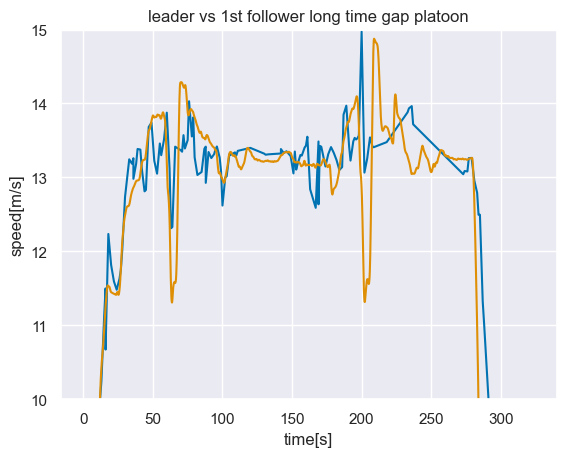

In [97]:
df2 = pd.read_csv('data/leaders/test3_tracker.csv')
df_short_leader = df2[(df2['Time']>5032) & (df2['Time']<5356)]
ref_time = min(df_short_leader['Time'])
df_short_leader['Time'] = df_short_leader['Time']-ref_time
df_short_platoon = pd.read_csv('data_for_engine/long_time_gap_14_5ms.csv')
plt.plot(df_short_leader['Time'],df_short_leader['speed'])
plt.plot(df_short_platoon['Time'],df_short_platoon['Speed2'])
plt.xlabel('time[s]');plt.ylabel('speed[m/s]');plt.title('leader vs 1st follower long time gap platoon')
plt.show()
plt.plot(df_short_leader['Time'],df_short_leader['speed'])
plt.plot(df_short_platoon['Time'],df_short_platoon['Speed2'])
plt.xlabel('time[s]');plt.ylabel('speed[m/s]');plt.title('leader vs 1st follower long time gap platoon')
plt.ylim([10,15])

/var/folders/mq/cjj_sp3148z4splt8wm1sp2hkxk65b/T/ipykernel_8725/34423768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short_leader['Time'] = df_short_leader['Time']-ref_time


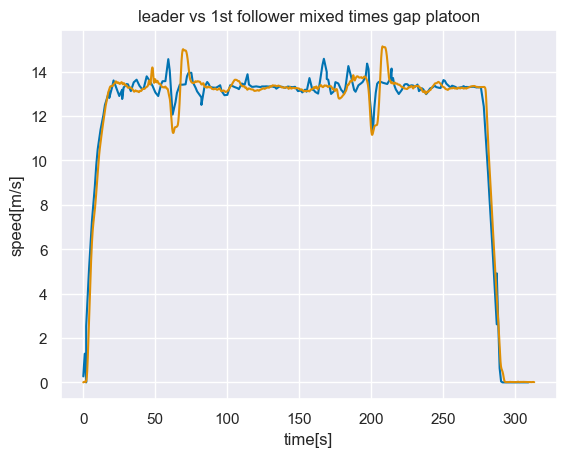

(10.0, 15.0)

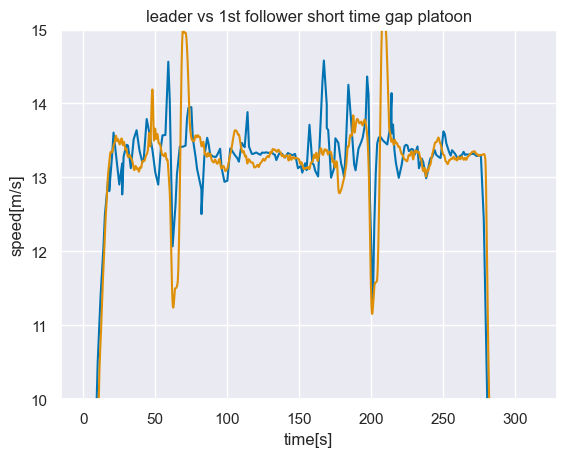

In [96]:
df2 = pd.read_csv('data/leaders/test3_tracker.csv')
df_short_leader = df2[(df2['Time']>4646) & (df2['Time']<4959)]
ref_time = min(df_short_leader['Time'])
df_short_leader['Time'] = df_short_leader['Time']-ref_time
df_short_platoon = pd.read_csv('data_for_engine/mixed_time_gap_14_5ms.csv')
plt.plot(df_short_leader['Time'],df_short_leader['speed'])
plt.plot(df_short_platoon['Time'],df_short_platoon['Speed2'])
plt.xlabel('time[s]');plt.ylabel('speed[m/s]');plt.title('leader vs 1st follower mixed times gap platoon')
plt.show()
plt.plot(df_short_leader['Time'],df_short_leader['speed'])
plt.plot(df_short_platoon['Time'],df_short_platoon['Speed2'])
plt.xlabel('time[s]');plt.ylabel('speed[m/s]');plt.title('leader vs 1st follower mixed times gap platoon')
plt.ylim([10,15])

<AxesSubplot: xlabel='Time'>

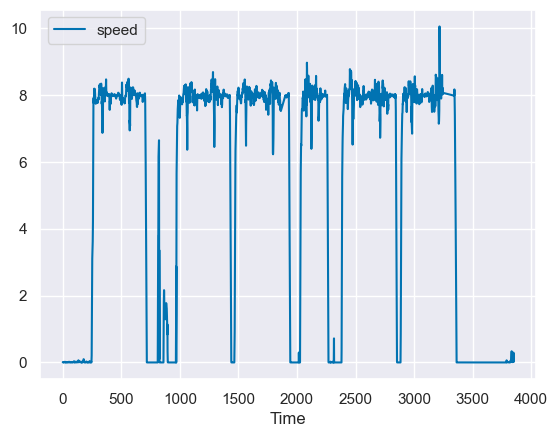

In [14]:
df1 = pd.read_csv('data/leaders/test1_tracker.csv')
df1.plot('Time','speed')

<AxesSubplot: xlabel='Time'>

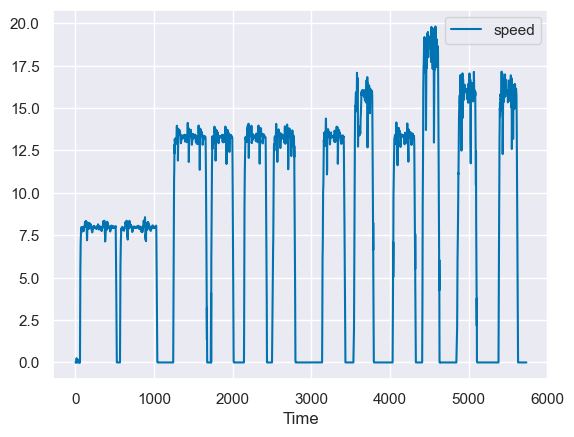

In [15]:
df2 = pd.read_csv('data/leaders/test2_tracker.csv')
df2.plot('Time','speed')

<AxesSubplot: xlabel='Time'>

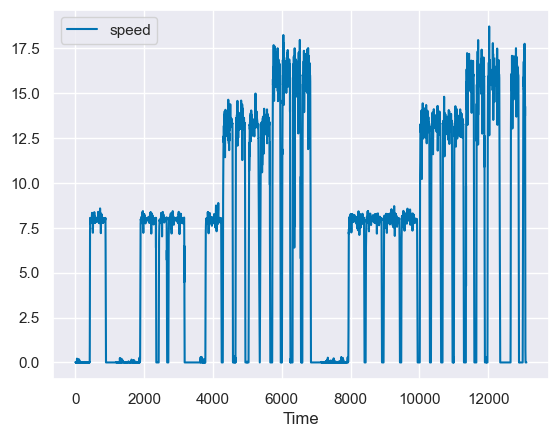

In [13]:
df3 = pd.read_csv('data/leaders/test3_tracker.csv')
df3.plot('Time','speed')

/var/folders/mq/cjj_sp3148z4splt8wm1sp2hkxk65b/T/ipykernel_8725/336185987.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short_leader['Time'] = df_short_leader['Time']-ref_time


Text(0.5, 1.0, 'leader vs 1st follower HDV platoon \n(not the used one))')

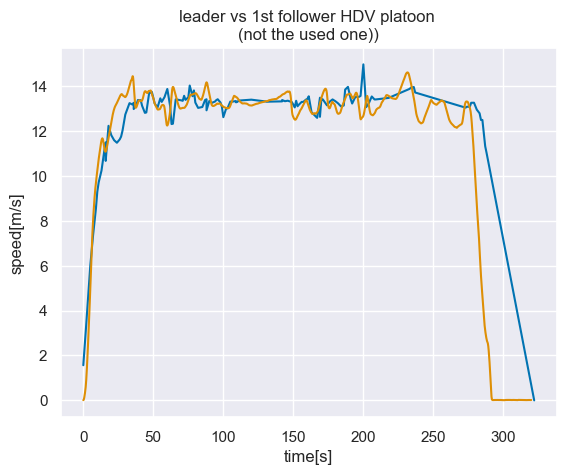

In [46]:
df2 = pd.read_csv('data/leaders/test3_tracker.csv')
df_short_leader = df2[(df2['Time']>5032) & (df2['Time']<5356)]
ref_time = min(df_short_leader['Time'])
df_short_leader['Time'] = df_short_leader['Time']-ref_time
df_short_platoon = pd.read_csv('data/no_ACC/handling_part22.csv', skiprows=range(0, 5))
ref_time = min(df_short_platoon['Time'])
df_short_platoon['Time'] = df_short_platoon['Time']-ref_time
plt.plot(df_short_leader['Time'],df_short_leader['speed'])
plt.plot(df_short_platoon['Time'],df_short_platoon['Speed2'])
plt.xlabel('time[s]');plt.ylabel('speed[m/s]');plt.title('leader vs 1st follower HDV platoon \n(not the used one))')